In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql.types import *
from pyspark import SparkContext
from pyspark.sql import SQLContext 
from pyspark.sql import SparkSession
from pyspark.ml.feature import MinMaxScaler
import logging

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Spark_GBT_Ener00.com") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.utils import AnalysisException
import os
spark.sparkContext.setLogLevel("ERROR")
logging.getLogger("py4j").setLevel(logging.ERROR)


main_folder = '/Volumes/G Drive/enertalk/00'

# Create a dictionary to store the appliance data
appliance_data = {}

# Iterate over subfolders in the main folder
for subfolder in os.listdir(main_folder):
    if subfolder == '.DS_Store':
        continue

    subfolder_path = os.path.join(main_folder, subfolder)

    if not os.path.isdir(subfolder_path):
        continue

    try:
        # Load the washing machine data
        washing_machine_files = [file for file in os.listdir(subfolder_path) if 'washing-machine' in file and file.endswith('.parquet.gzip')]
        for file in washing_machine_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            washing_machine_data = spark.read.parquet(file_path)
            appliance_data[appliance_name] = washing_machine_data

        # Load the rice cooker data
        rice_cooker_files = [file for file in os.listdir(subfolder_path) if 'rice-cooker' in file and file.endswith('.parquet.gzip')]
        for file in rice_cooker_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            rice_cooker_data = spark.read.parquet(file_path)
            appliance_data[appliance_name] = rice_cooker_data

        # Load the total data
        total_files = [file for file in os.listdir(subfolder_path) if 'total' in file and file.endswith('.parquet.gzip')]
        for file in total_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            total_data = spark.read.parquet(file_path)
            appliance_data[appliance_name] = total_data

        # Load the TV data
        tv_files = [file for file in os.listdir(subfolder_path) if 'TV' in file and file.endswith('.parquet.gzip')]
        for file in tv_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            tv_data = spark.read.parquet(file_path)
            appliance_data[appliance_name] = tv_data

        # Load the microwave data
        microwave_files = [file for file in os.listdir(subfolder_path) if 'microwave' in file and file.endswith('.parquet.gzip')]
        for file in microwave_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            microwave_data = spark.read.parquet(file_path)
            appliance_data[appliance_name] = microwave_data

        # Load the water purifier data
        water_pur_files = [file for file in os.listdir(subfolder_path) if 'water-purifier' in file and file.endswith('.parquet.gzip')]
        for file in water_pur_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            water_pur_data = spark.read.parquet(file_path)
            appliance_data[appliance_name] = water_pur_data

        # Load the fridge data
        fridge_files = [file for file in os.listdir(subfolder_path) if 'fridge' in file and file.endswith('.parquet.gzip')]
        for file in fridge_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            fridge_data = spark.read.parquet(file_path)
            appliance_data[appliance_name] = fridge_data
            
        kimchi_fridge_files = [file for file in os.listdir(subfolder_path) if 'kimchi-fridge' in file and file.endswith('.parquet.gzip')]
        for file in kimchi_fridge_files:
            kimchi_fridge_path = os.path.join(subfolder_path, file)
            kimchi_fridge_data = spark.read.parquet(kimchi_fridge_path)
            # Store the kimchi fridge data in the dictionary with the appliance name
            appliance_name = file.split('_')[1].split('.')[0]
            appliance_data[appliance_name] = kimchi_fridge_data

    except AnalysisException as e:
        # Handle the case when a file is not found
        print(f"Skipping folder {subfolder}: {e}")
        continue


23/06/06 20:08:16 WARN Utils: Your hostname, Evangeloss-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.2.5 instead (on interface en0)
23/06/06 20:08:16 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/06/06 20:08:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
from functools import reduce  
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.sql import DataFrame

join_data = {'wash': washing_machine_data, 'rice': rice_cooker_data, 'tv': tv_data, 'micro': microwave_data, 'water': water_pur_data, 
             'kimchi_fridge' : kimchi_fridge_data, 'fridge': fridge_data}

for i, df_name in join_data.items():
    globals()["data_" + i] = total_data.join(df_name, on='timestamp')
    globals()["data_" + i] = globals()["data_" + i].drop('timestamp', '__index_level_0__')
    globals()["data_" + i] = globals()["data_" + i].toDF('total_active_power', 'total_reactive_power',
                                                         i + '_active_power', i + '_reactive_power')
    for column in globals()["data_" + i].columns:
        globals()["data_" + i] = globals()["data_" + i].withColumn(column, col(column).cast(DoubleType()))


In [4]:
from pyspark.sql.functions import col

for i in ['wash', 'rice', 'tv', 'micro', 'water', 'kimchi_fridge', 'fridge']:
    
    globals()["data_" + i] =  globals()["data_" + i].dropna()
    globals()["data_" + i].show()
    print(globals()["data_" + i].count())
    
    print(globals()["data_" + i].printSchema())


+------------------+--------------------+-----------------+-------------------+
|total_active_power|total_reactive_power|wash_active_power|wash_reactive_power|
+------------------+--------------------+-----------------+-------------------+
|            360.22|               44.76|             0.01|               5.95|
|            382.05|               43.86|             0.04|               5.91|
|            386.41|               43.86|             0.06|               6.01|
|            386.98|               44.02|              0.1|               5.99|
|             386.2|               43.54|             0.05|               6.04|
|            386.45|               44.03|             0.12|               6.04|
|            387.11|               43.94|             0.03|               6.01|
|            386.97|                44.3|             0.07|               6.07|
|            387.42|               44.61|             0.04|               6.03|
|            386.74|                44.5

Metrics for wash - wash_active_power:
RMSE: 94.770792549549
MSE: 8981.503120469653
MAE: 10.556152025455361
R2: 0.9278510830907727


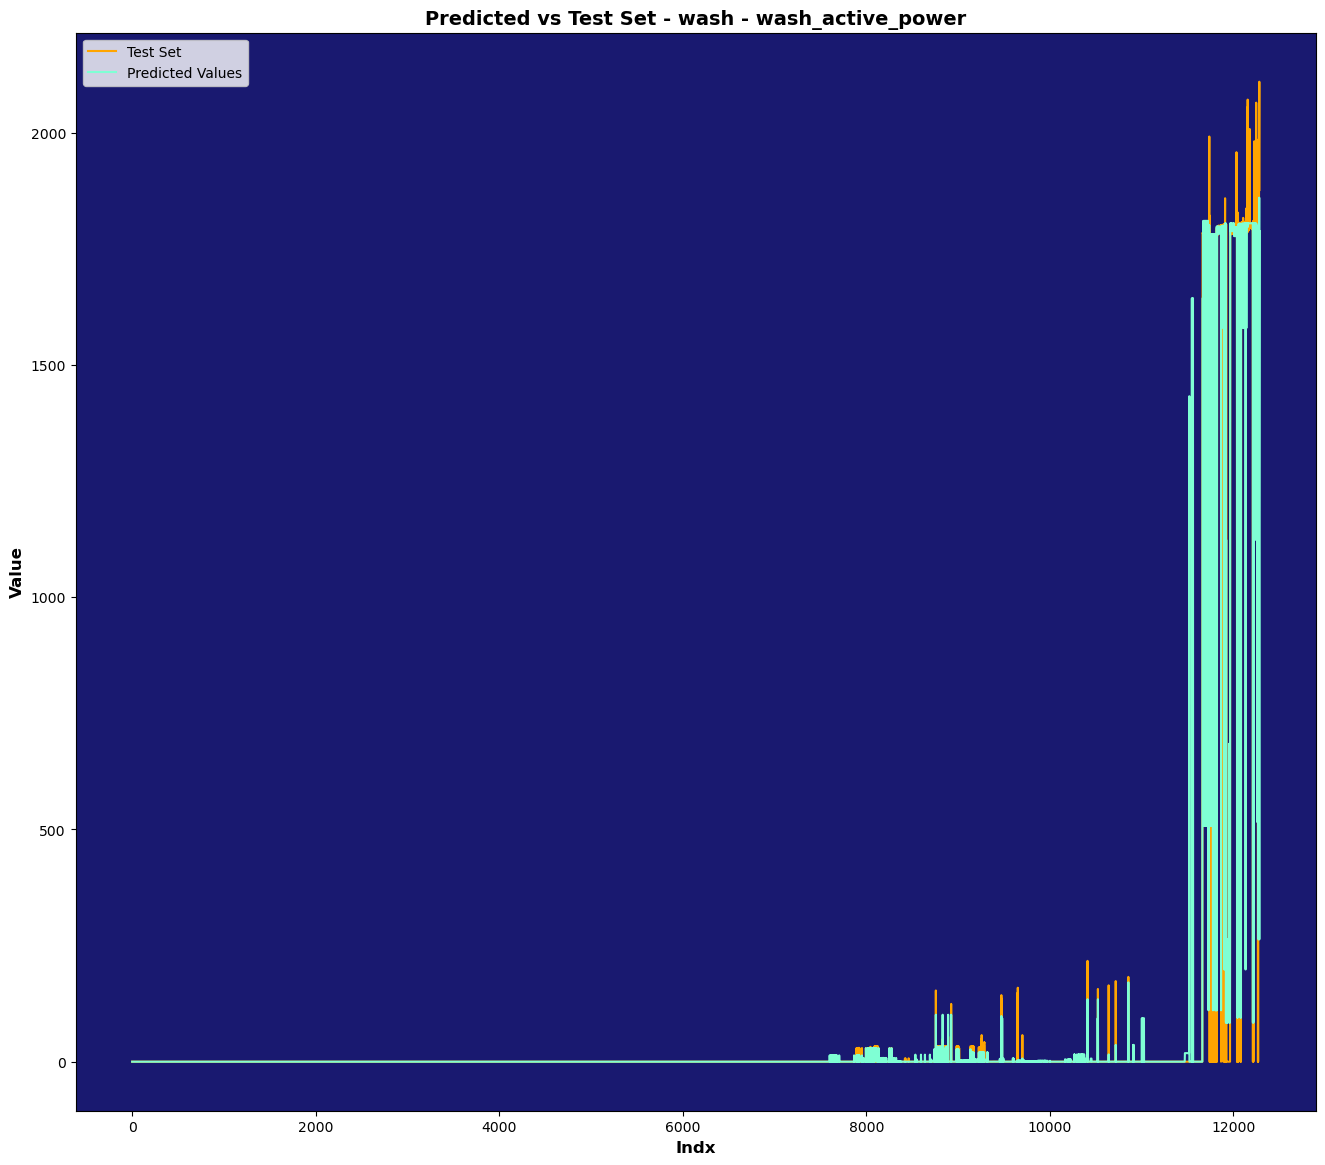

Metrics for wash - wash_reactive_power:
RMSE: 3.7396485435960525
MSE: 13.984971229620076
MAE: 0.7456916170966159
R2: 0.808075946128225


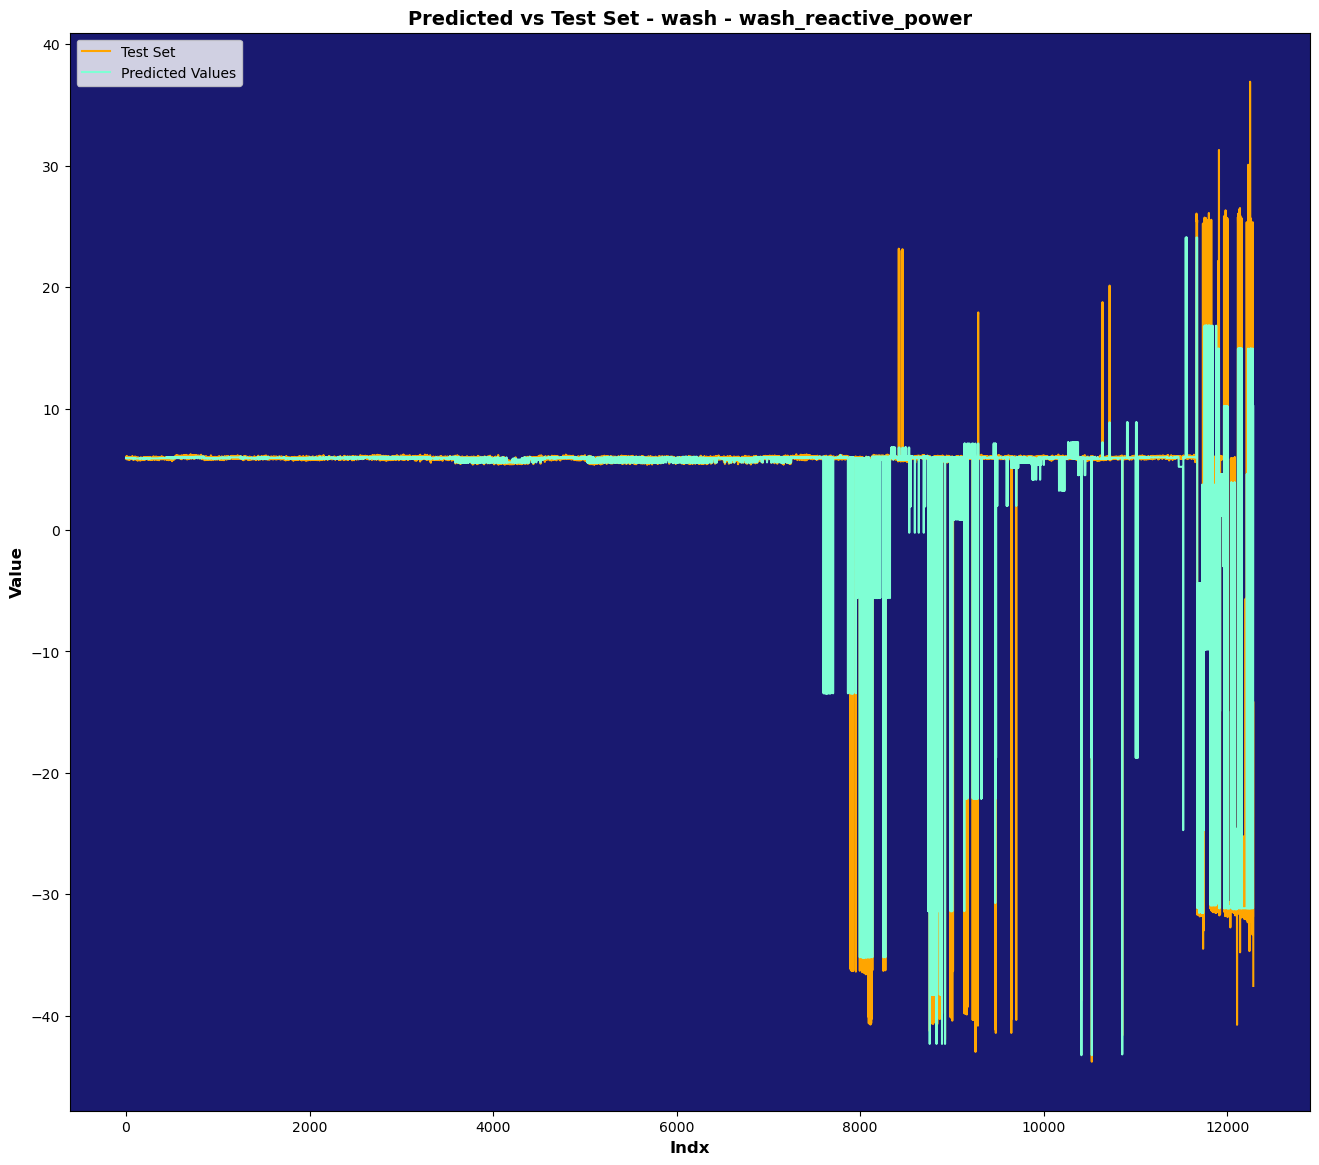

Metrics for tv - tv_active_power:
RMSE: 12.6991846421622
MSE: 161.26929057572826
MAE: 4.393114943771166
R2: 0.9231182826855527


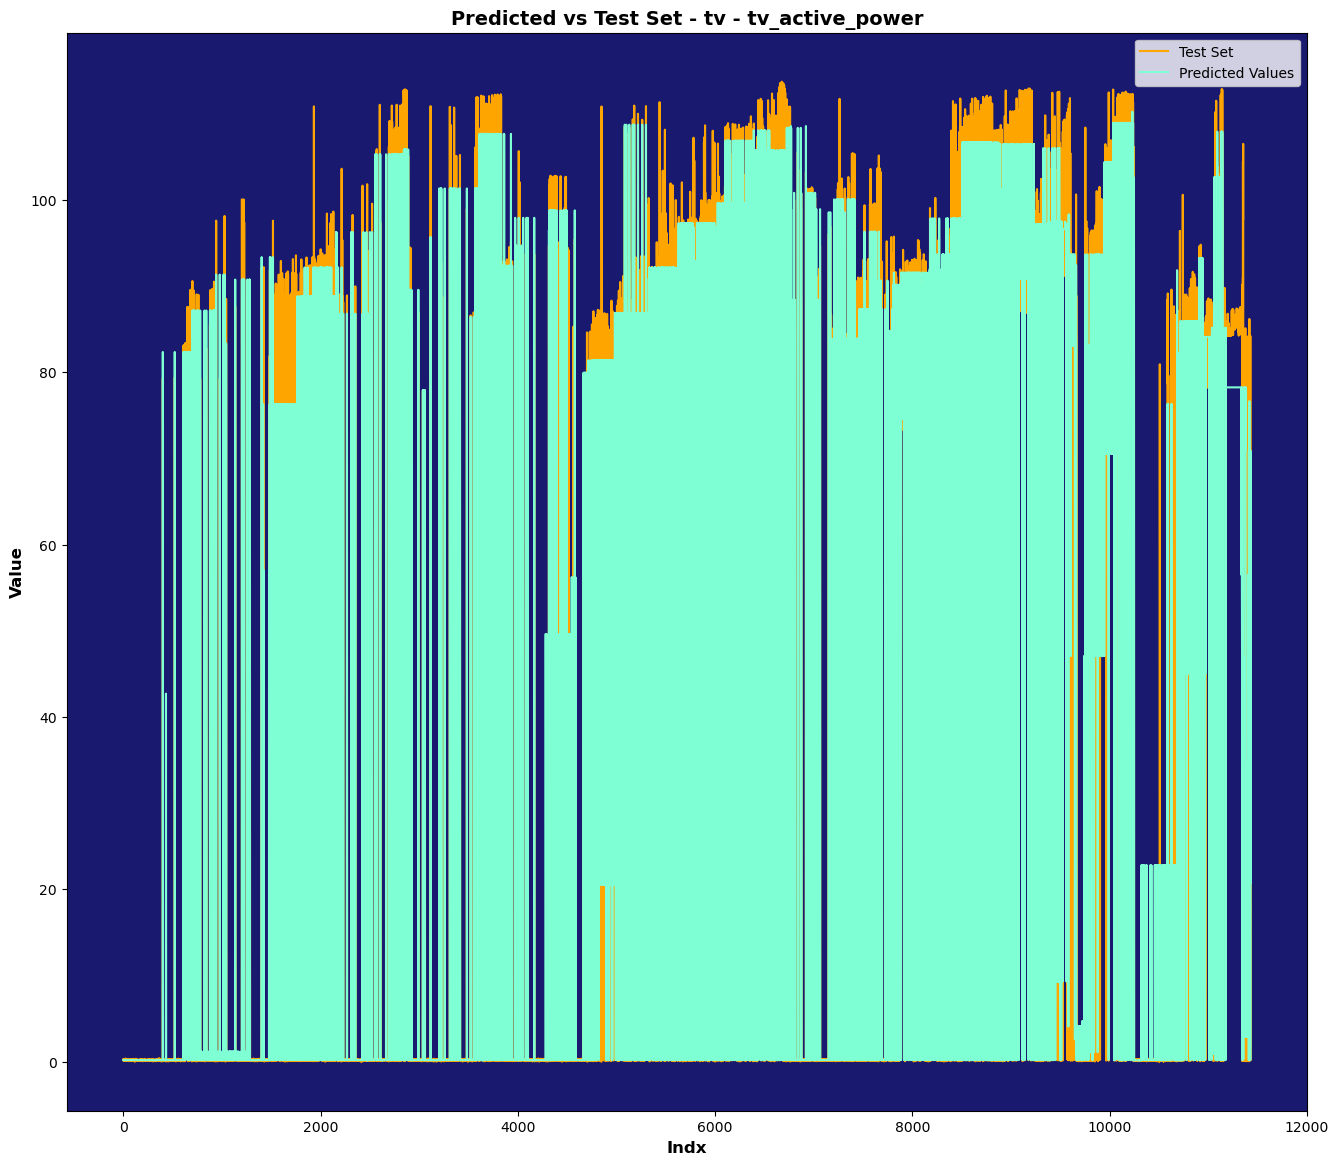

Metrics for tv - tv_reactive_power:
RMSE: 3.4613569649682145
MSE: 11.98099203893397
MAE: 1.0695773647048903
R2: 0.921196525603854


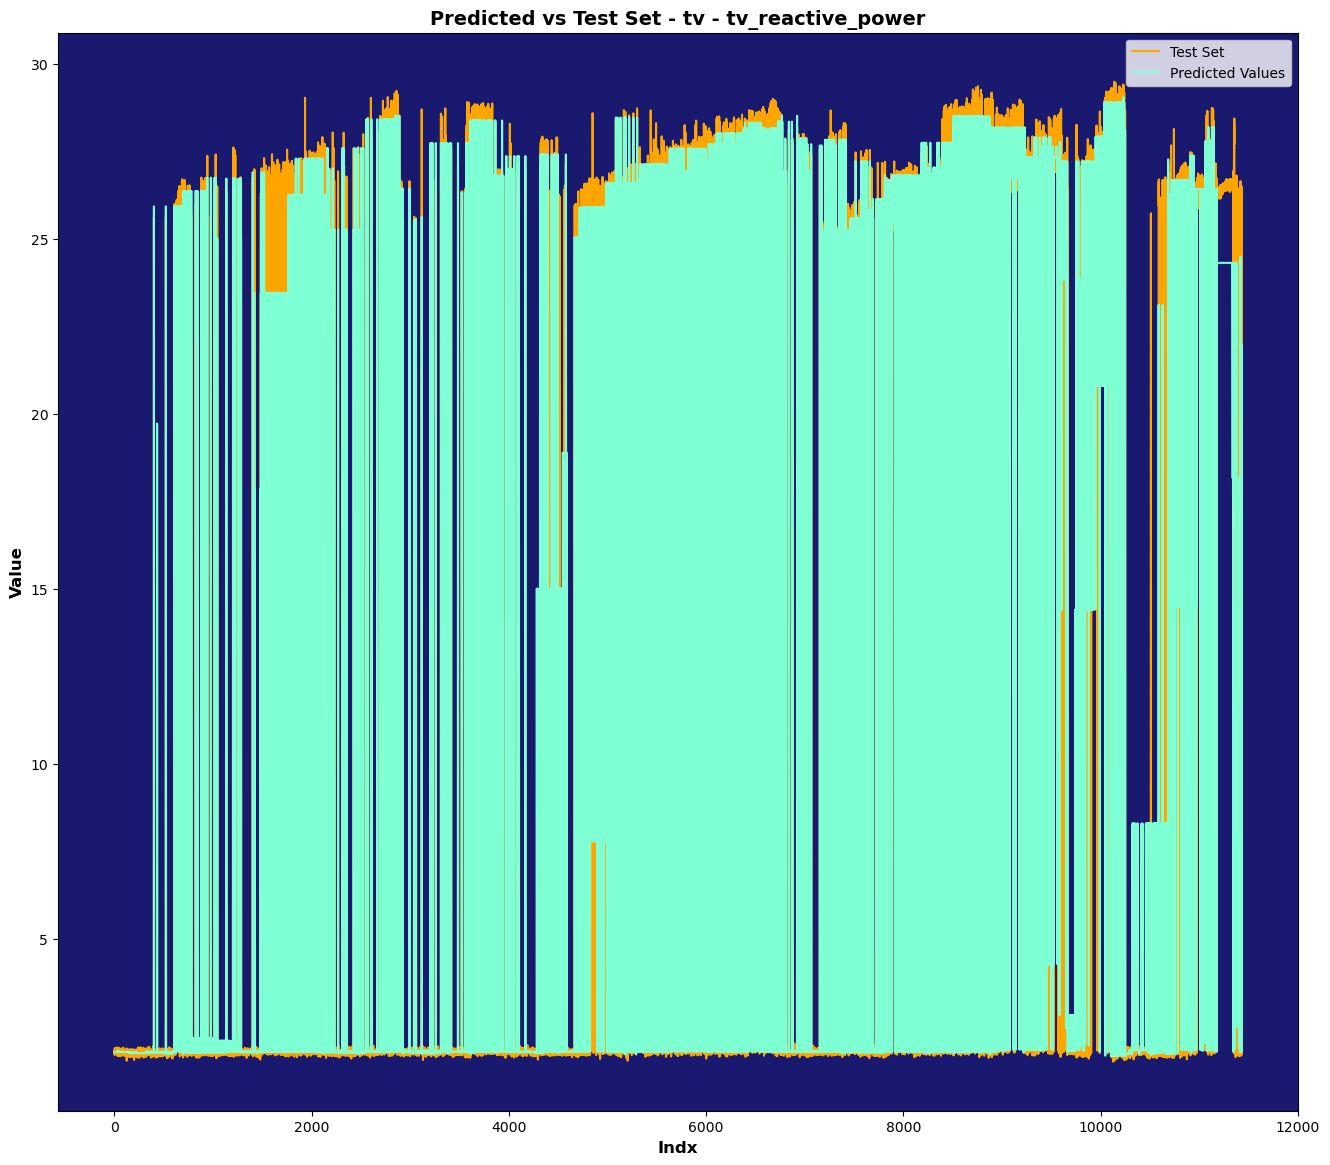

Metrics for micro - micro_active_power:
RMSE: 11.797193324073818
MSE: 139.17377032557187
MAE: 0.4476822839779805
R2: 0.6719362851141715


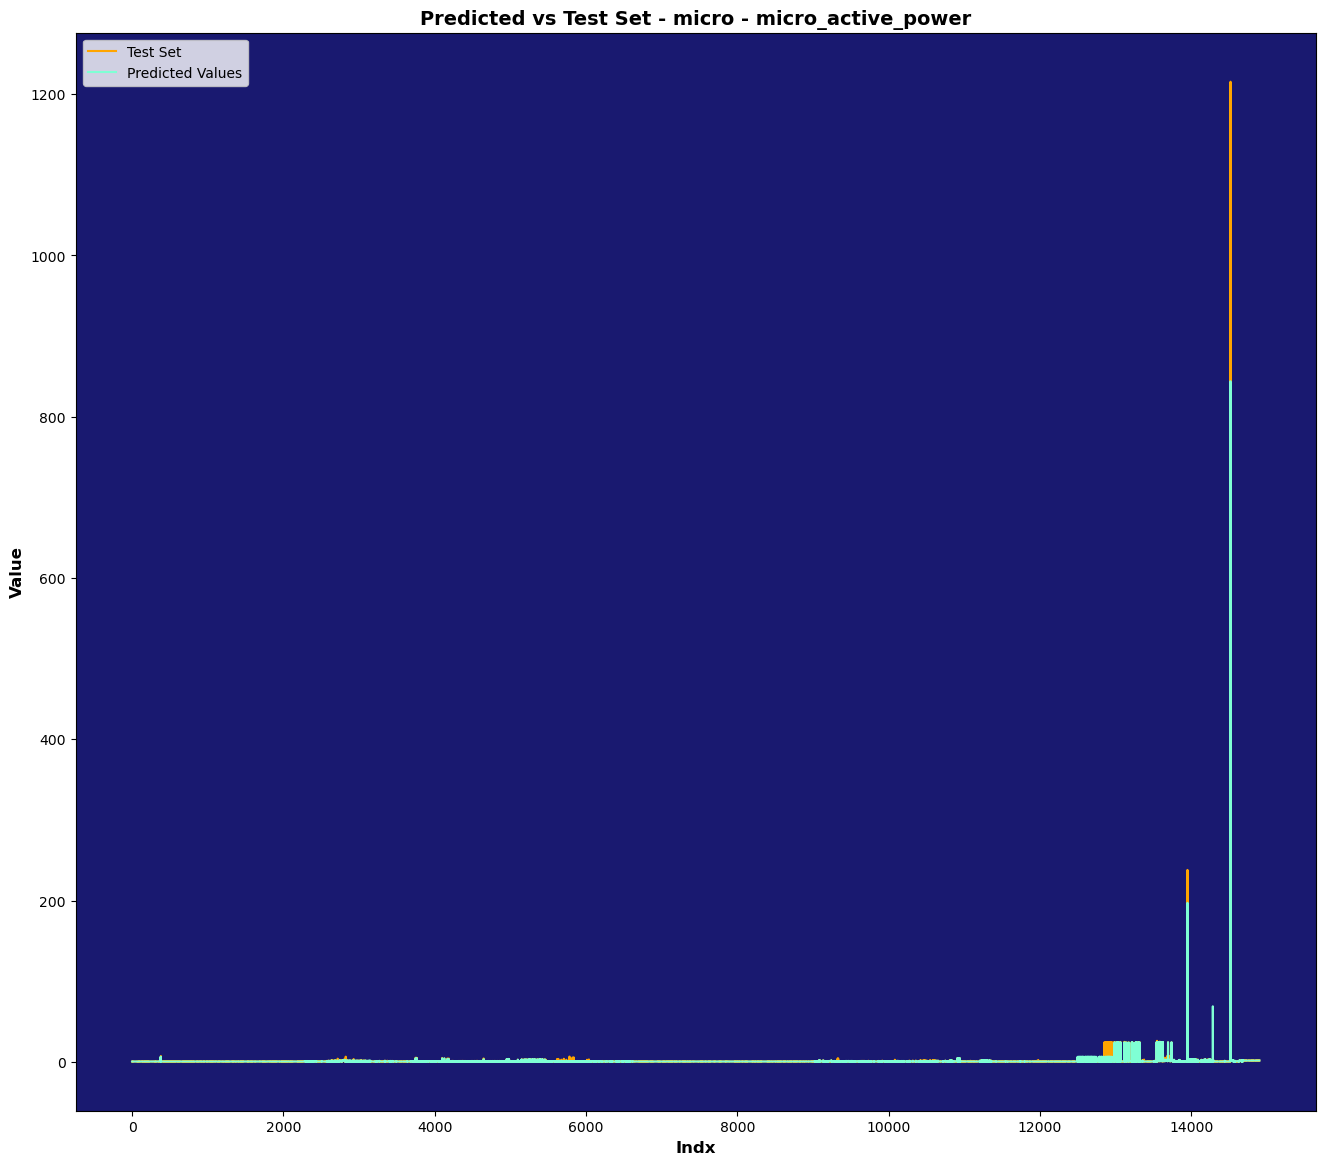

Metrics for micro - micro_reactive_power:
RMSE: 4.293452431277901
MSE: 18.433733779646115
MAE: 0.14337724572203617
R2: 0.762855188116564


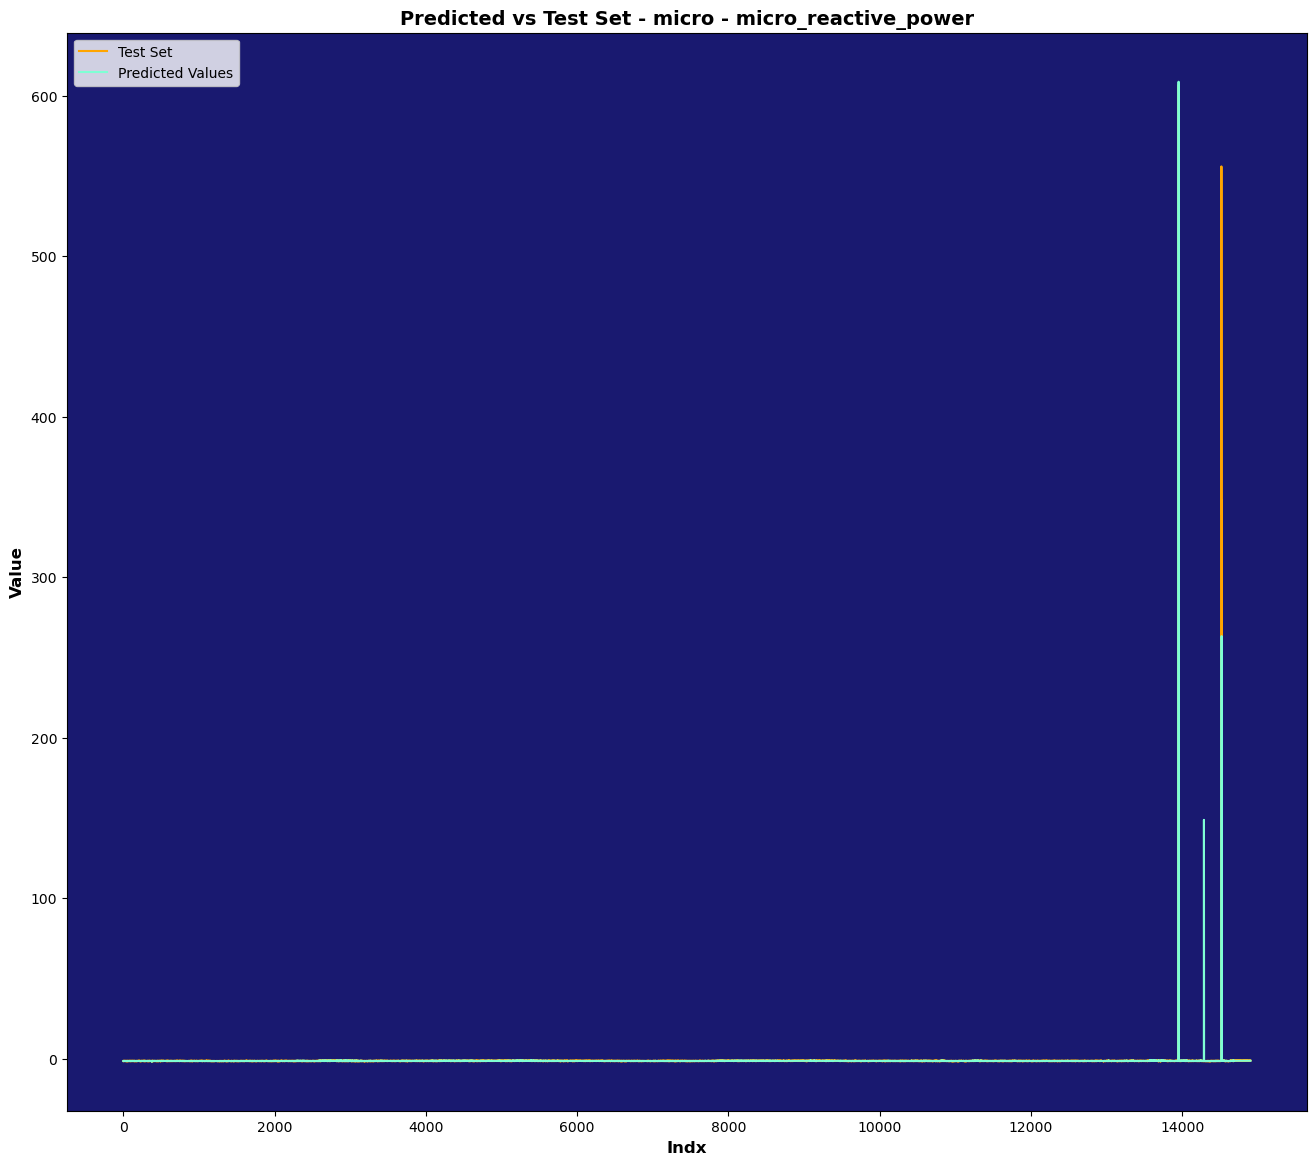

Metrics for water - water_active_power:
RMSE: 25.210941829715185
MSE: 635.5915879412828
MAE: 3.875813245946163
R2: 0.8410175400042047


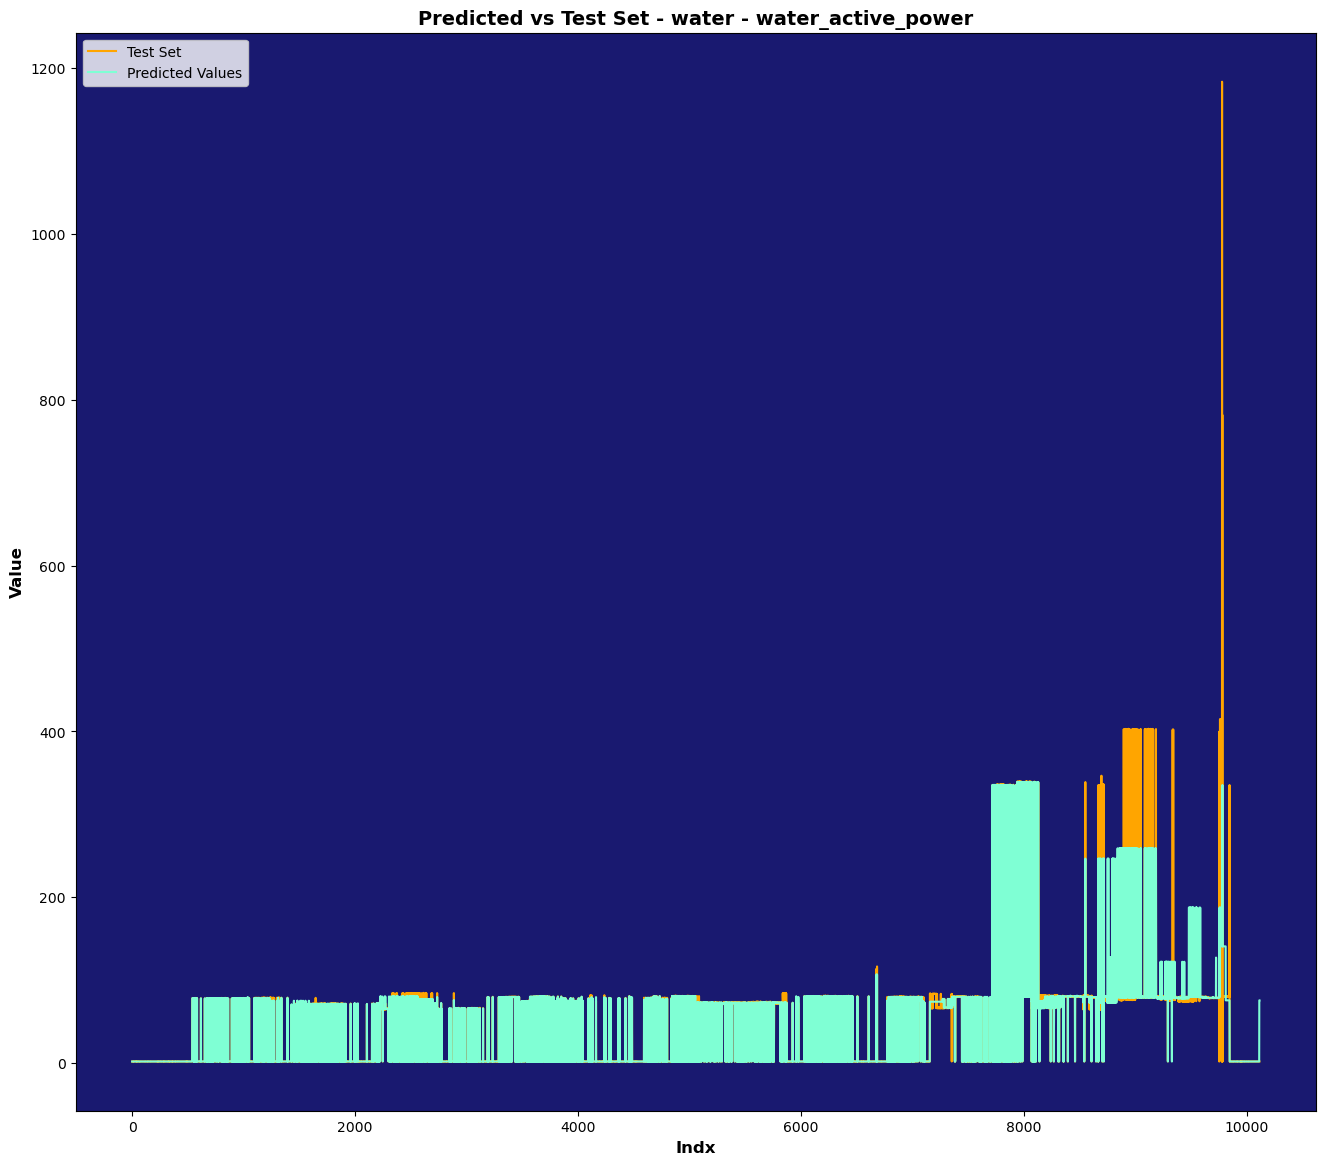

Metrics for water - water_reactive_power:
RMSE: 6.936603077501298
MSE: 48.116462254800474
MAE: 0.7999343041243344
R2: 0.9874012694493258


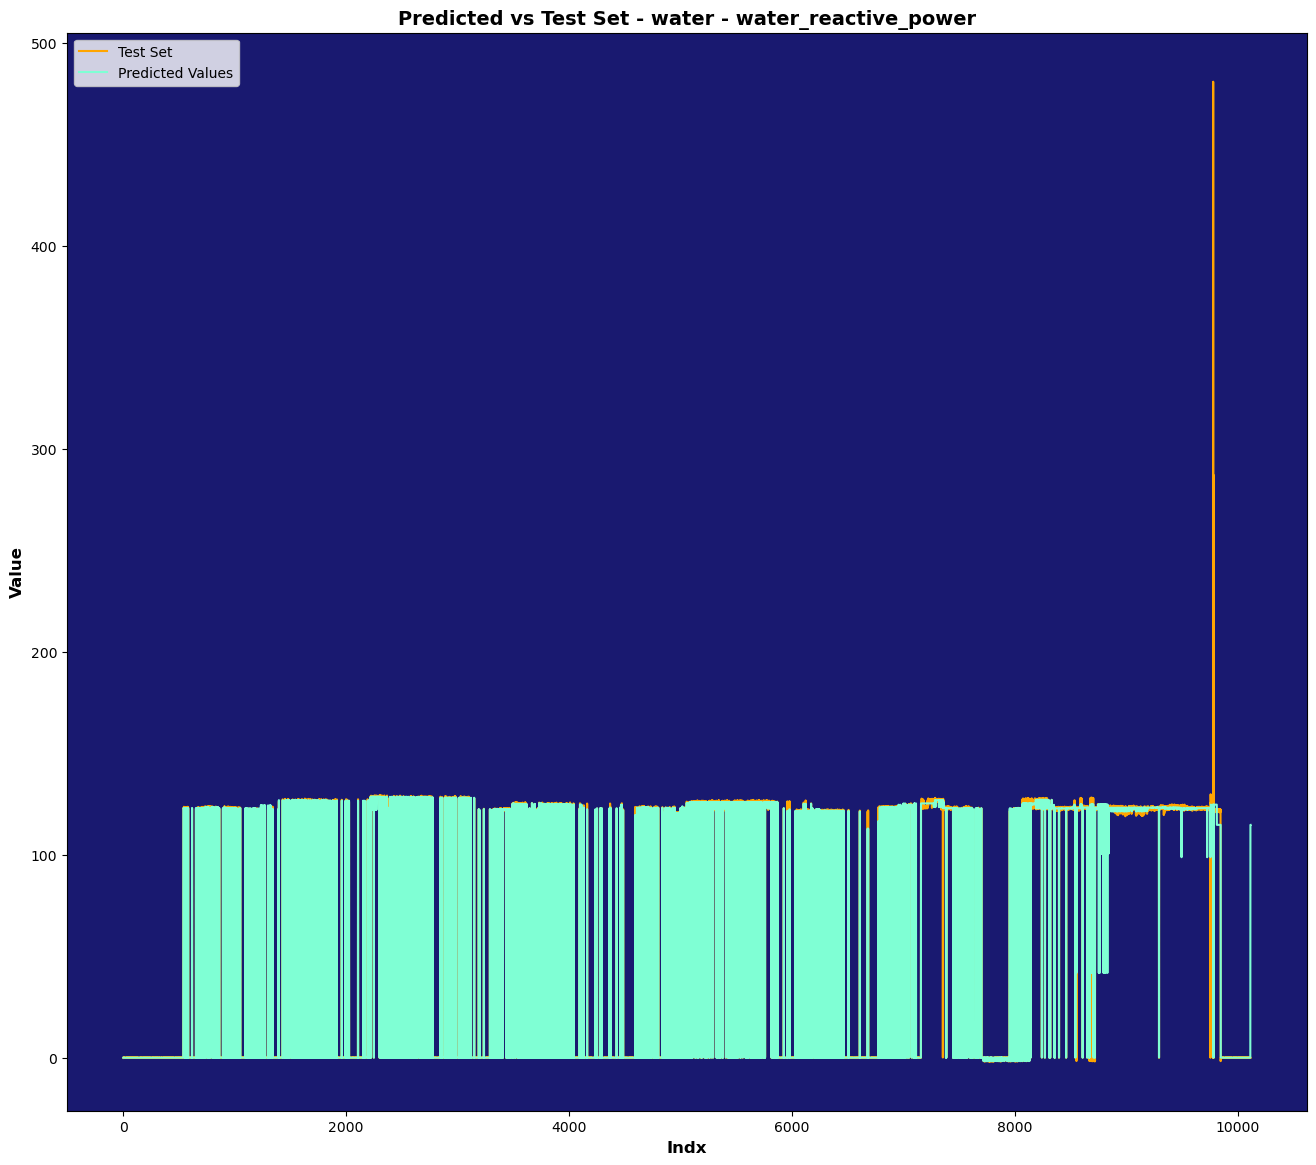

Metrics for rice - rice_active_power:
RMSE: 0.05850398099718304
MSE: 0.0034227157925187544
MAE: 0.046562145339715234
R2: -0.001919483759853069


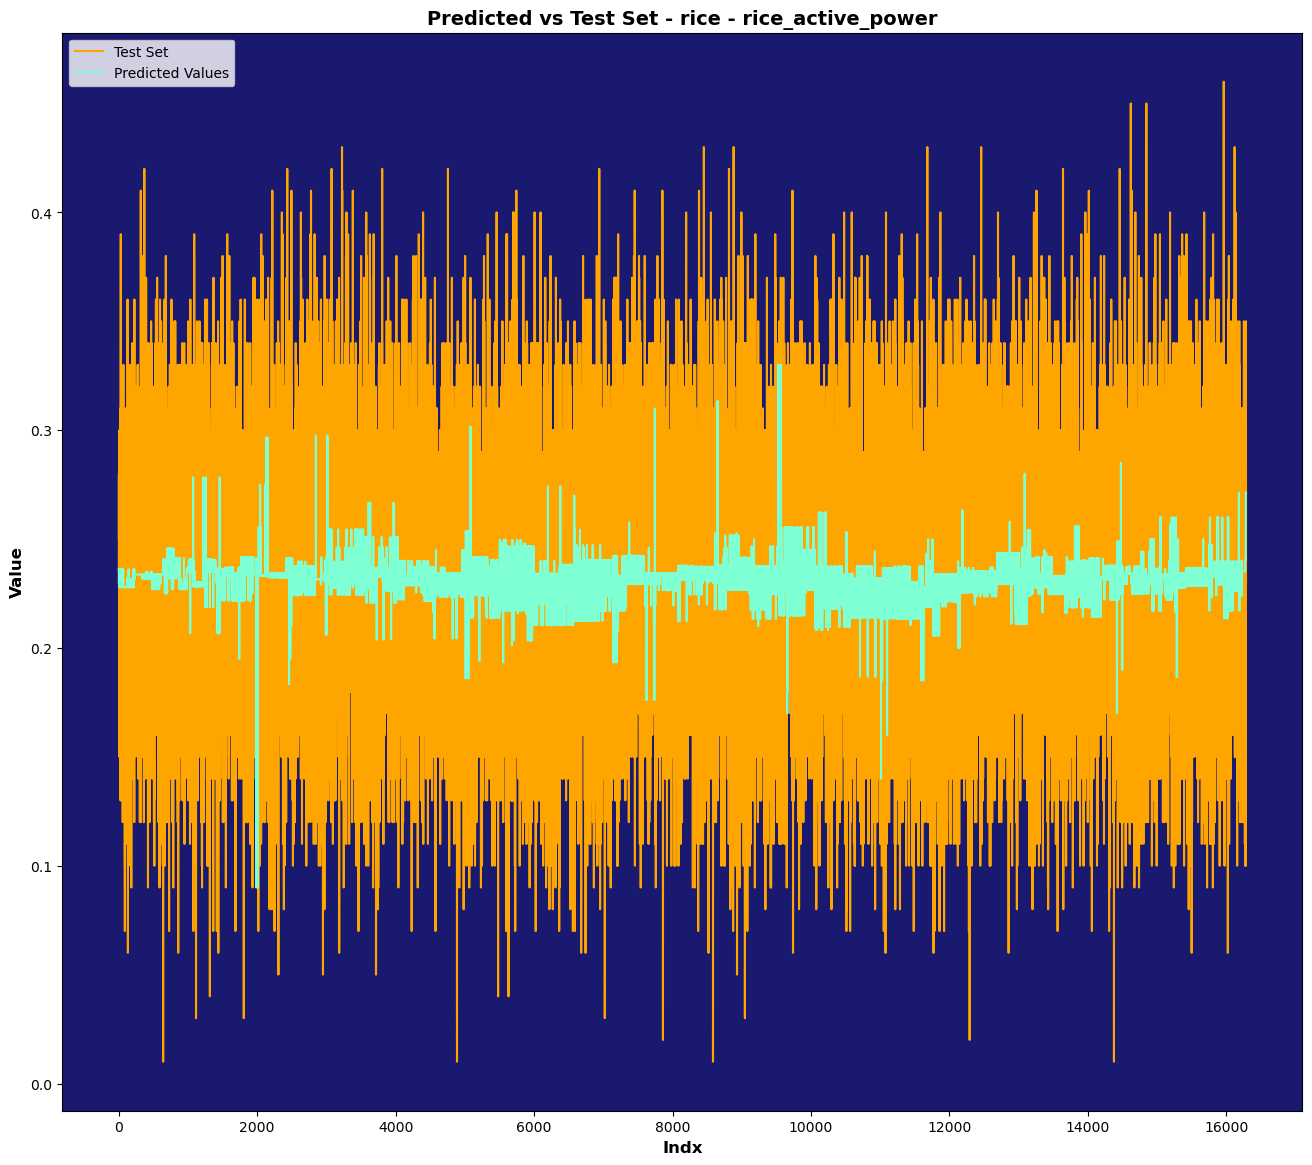

Metrics for rice - rice_reactive_power:
RMSE: 0.0613879657283826
MSE: 0.003768482336269077
MAE: 0.048789656970815776
R2: -0.00593861525227779


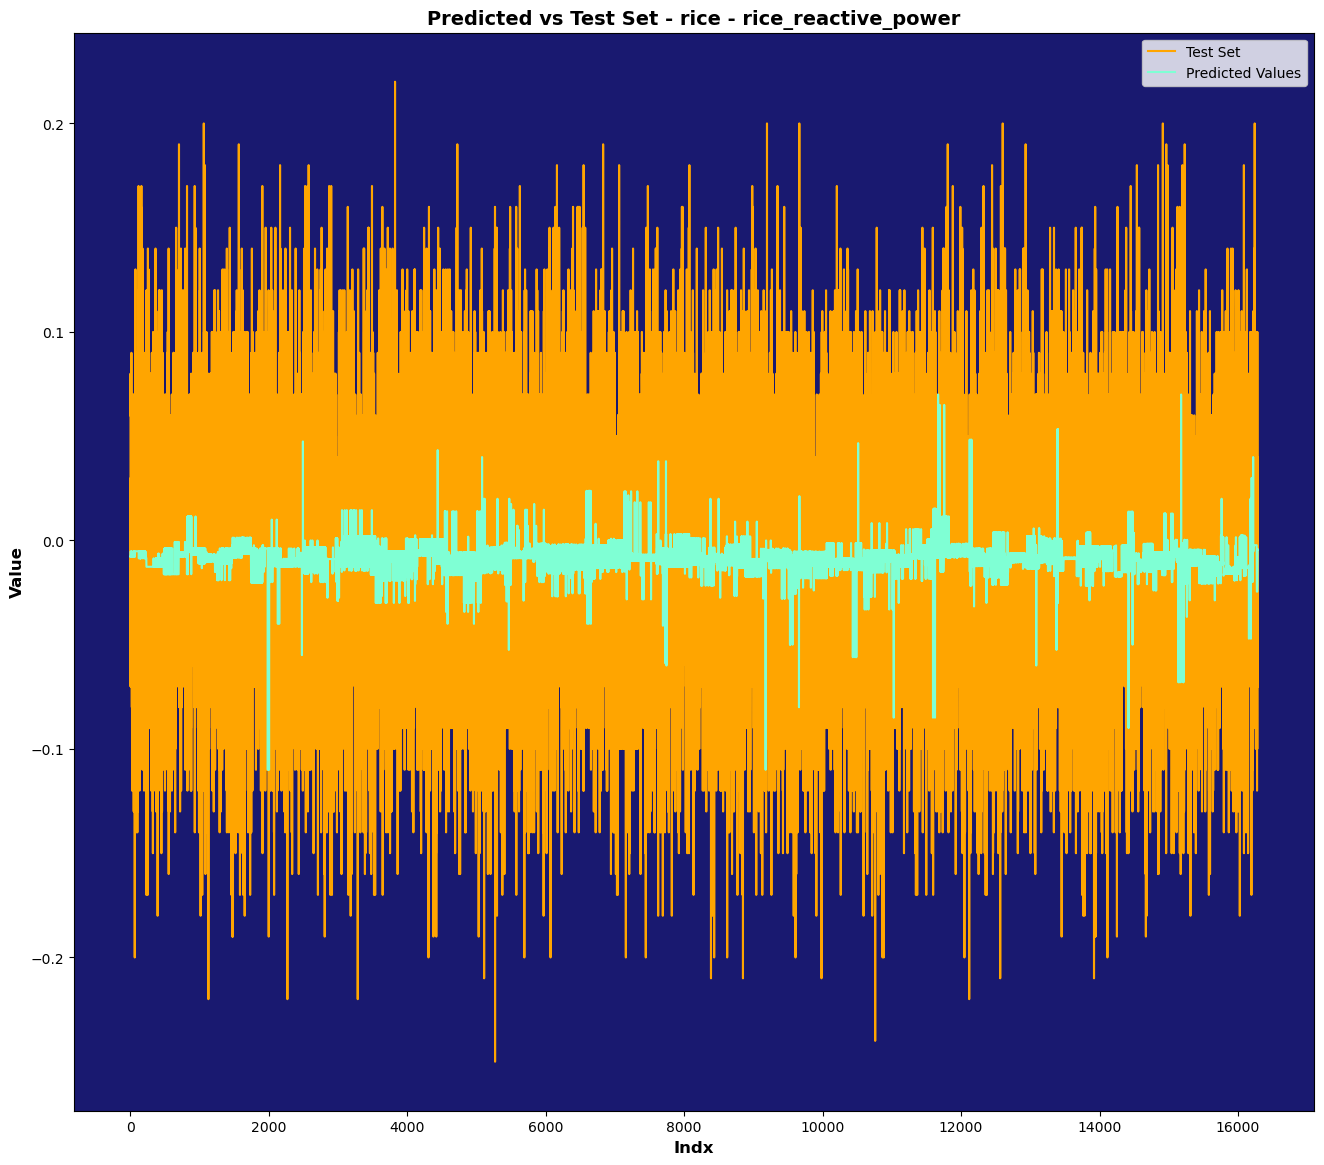

Metrics for fridge - fridge_active_power:
RMSE: 28.737425142881314
MSE: 825.8396038427071
MAE: 4.920261225036537
R2: 0.543595834233302


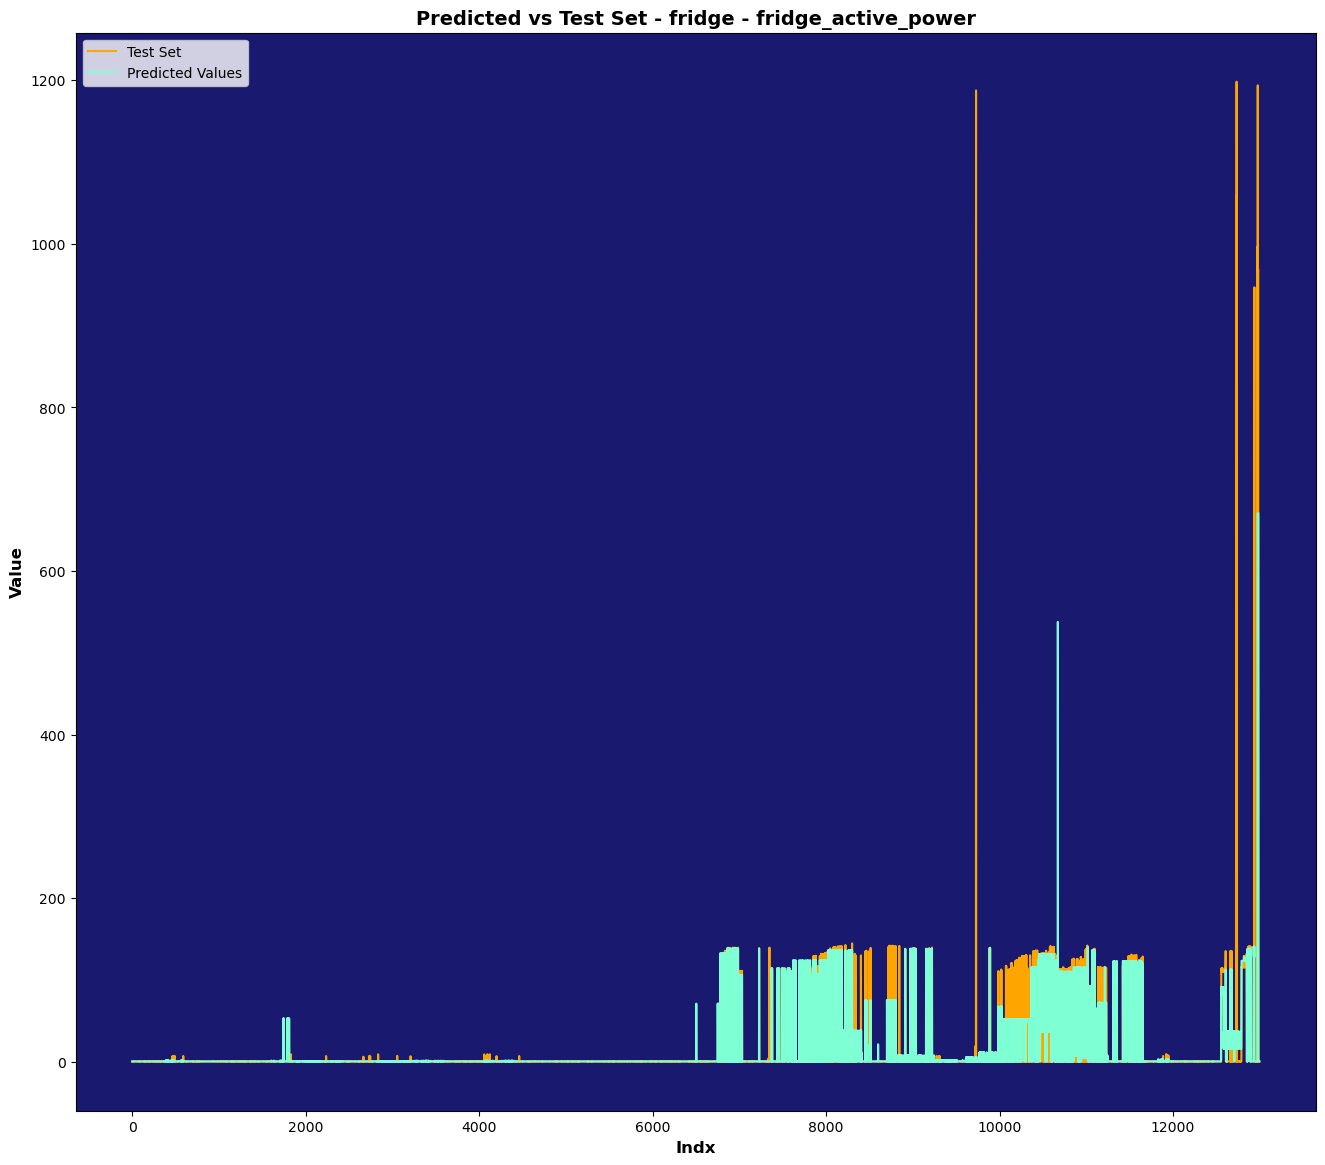

Metrics for fridge - fridge_reactive_power:
RMSE: 15.13993559017189
MSE: 229.21764967455346
MAE: 2.101473062591143
R2: 0.43990674494189363


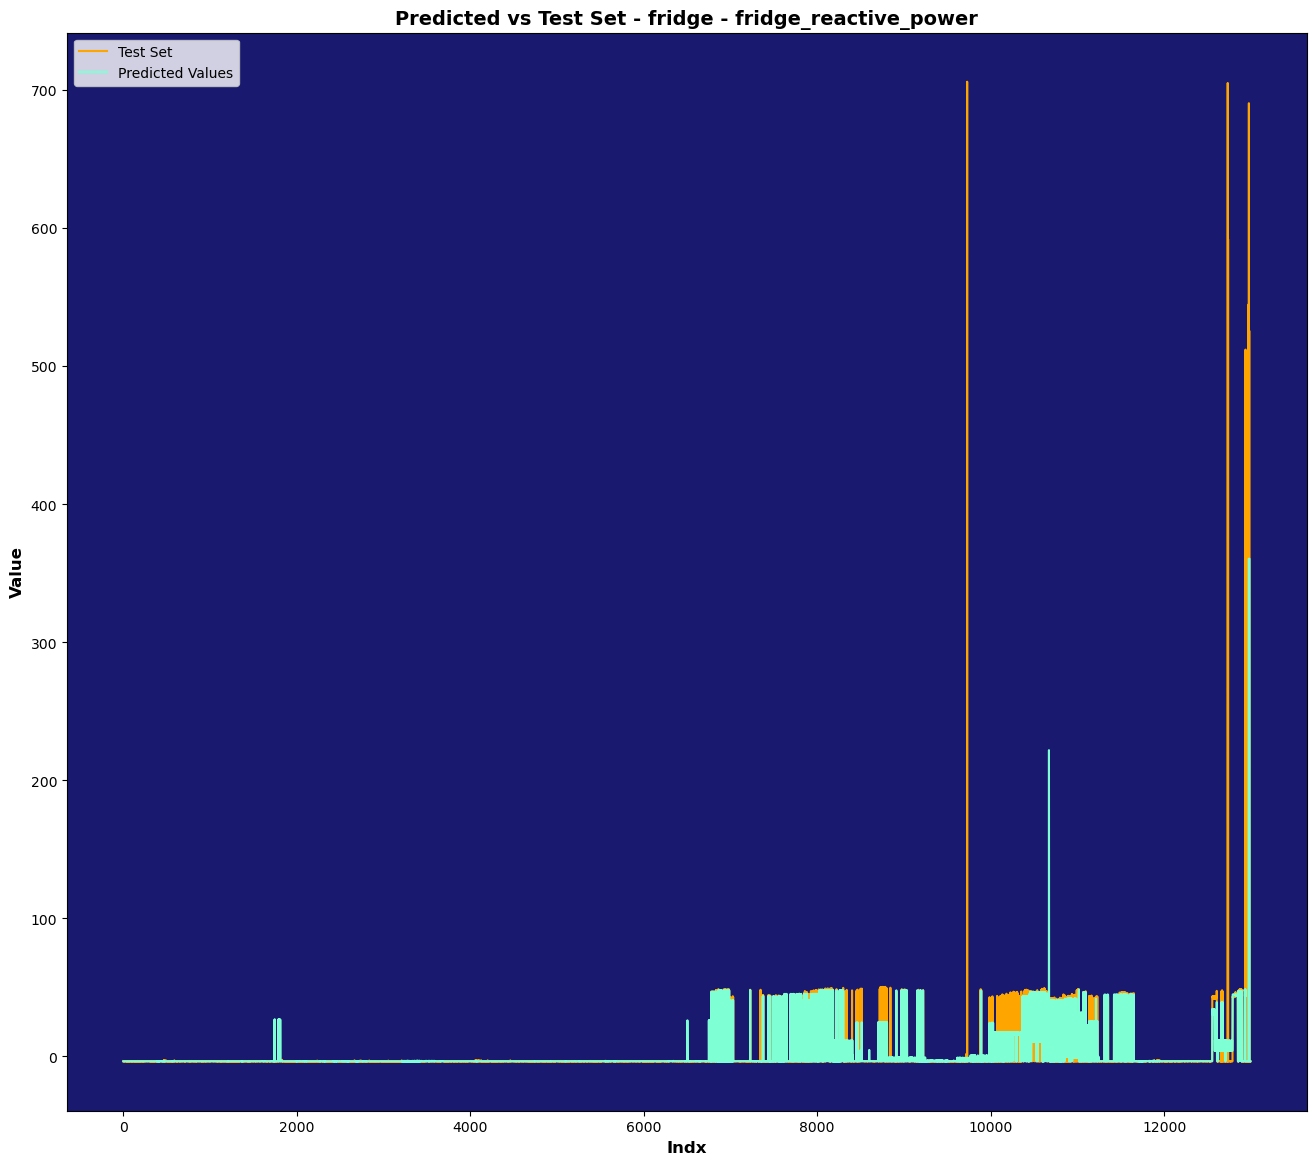

Metrics for kimchi_fridge - kimchi_fridge_active_power:
RMSE: 28.737425142881314
MSE: 825.8396038427071
MAE: 4.920261225036537
R2: 0.543595834233302


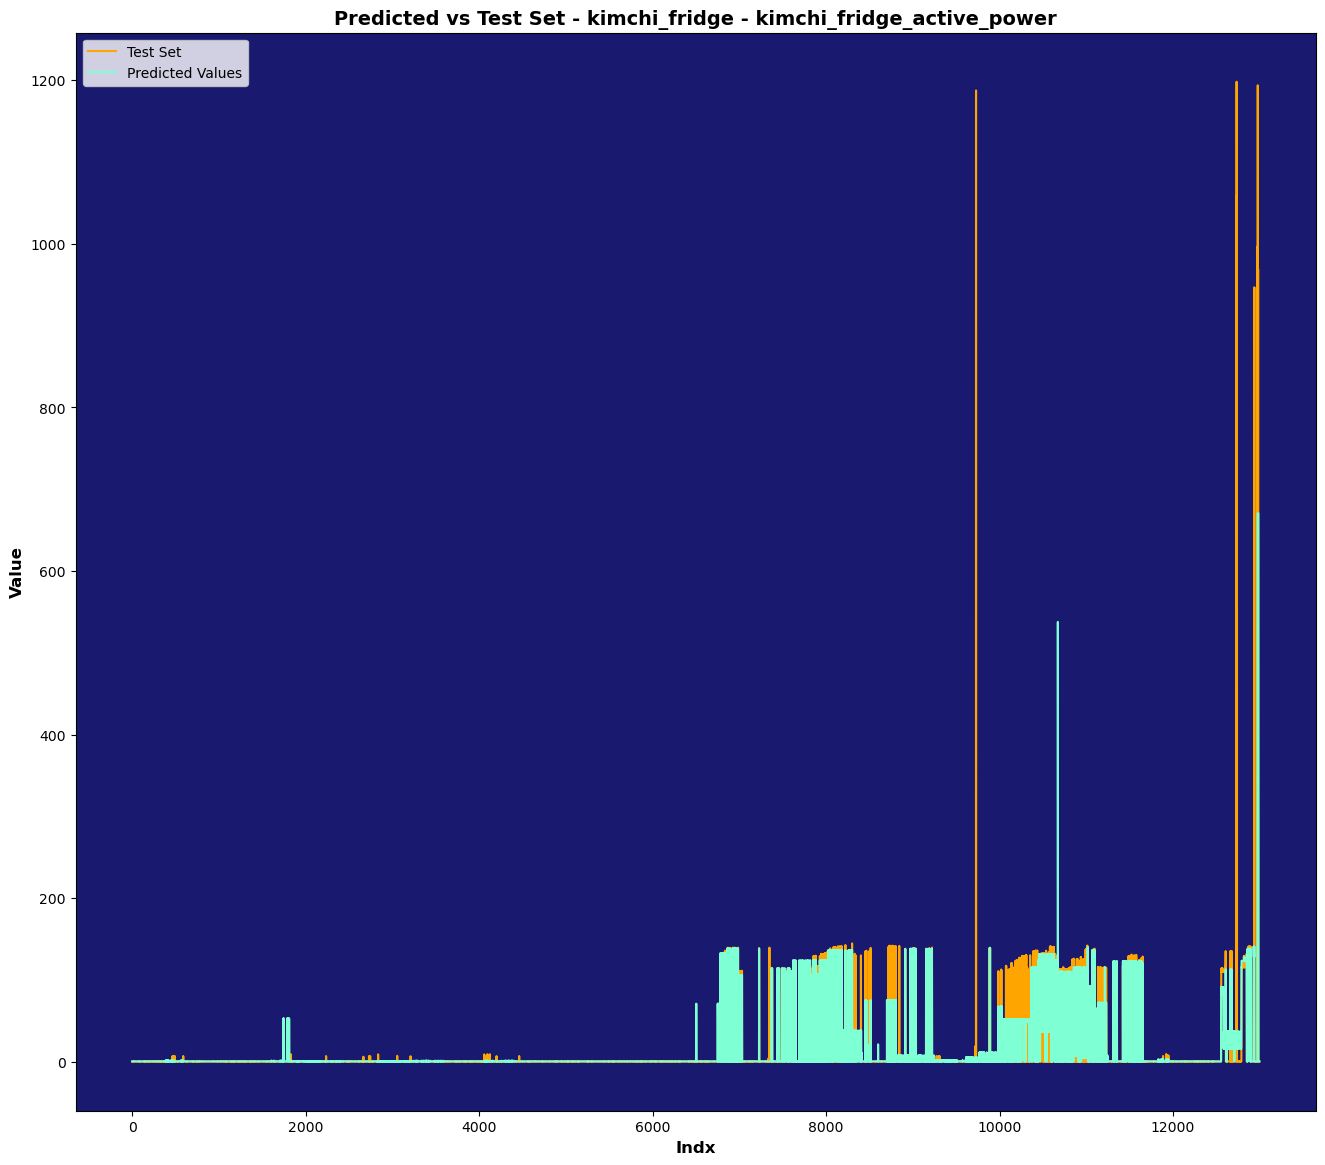

Metrics for kimchi_fridge - kimchi_fridge_reactive_power:
RMSE: 15.13993559017189
MSE: 229.21764967455346
MAE: 2.101473062591143
R2: 0.43990674494189363


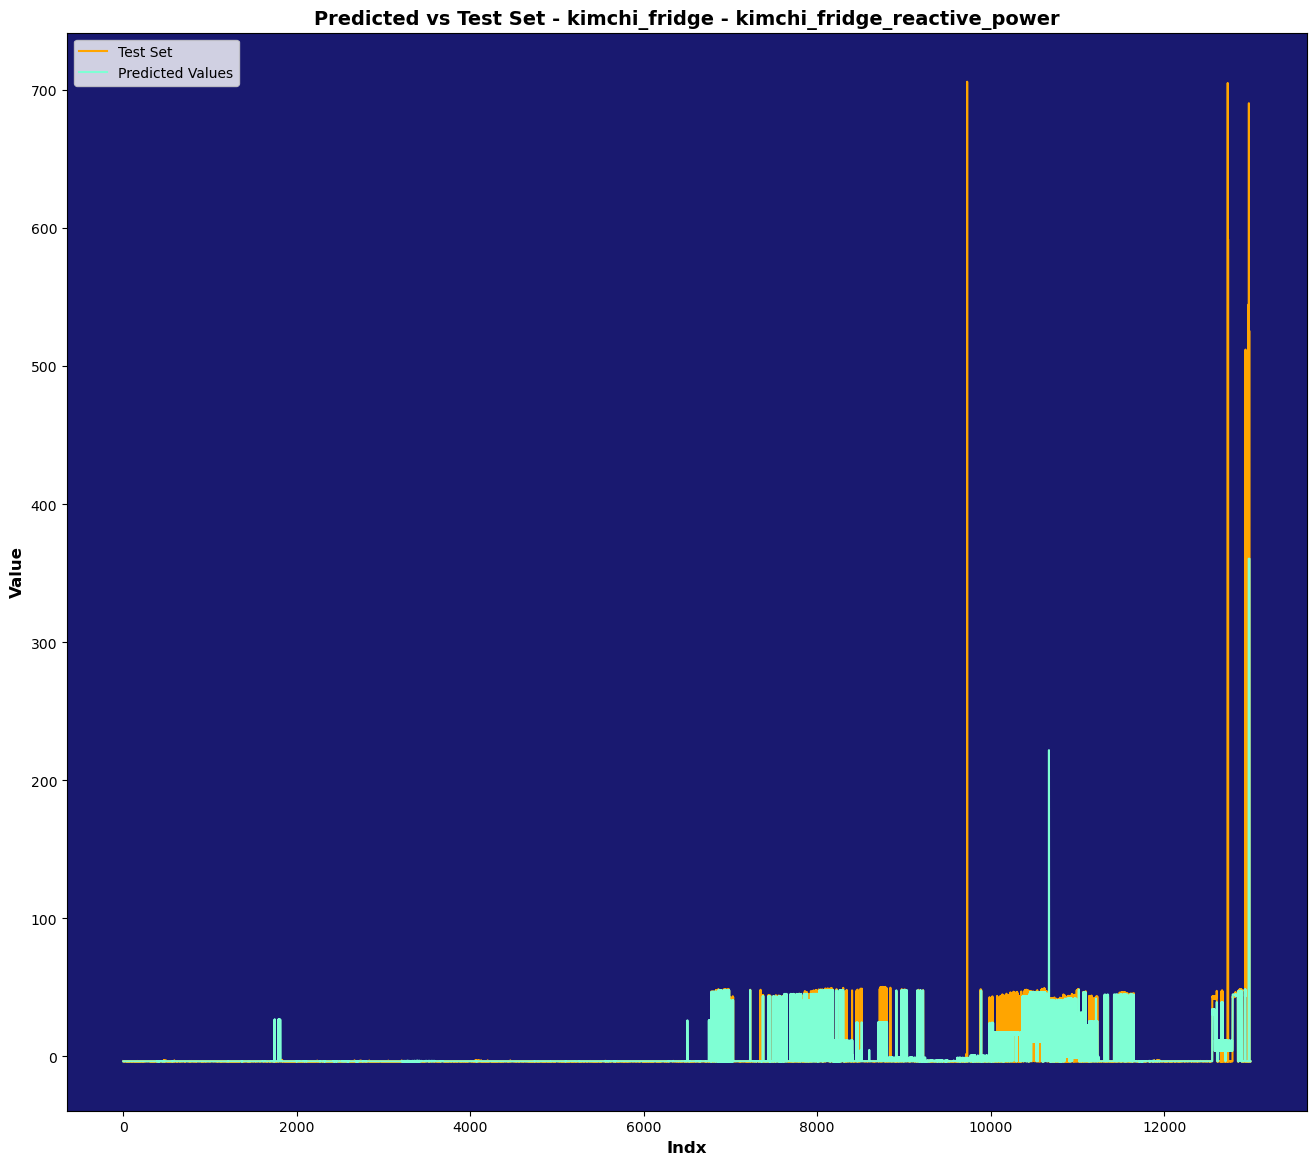

In [8]:
# Now we will implement 14 models that use each time the two total columns to predict the each column regarding each devices metrics,
# e.g. one model to predict the devices active power and another one for the appliances reactive power.... 14 train and test sets are made also 
# one for each devices specific feature

from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.evaluation import RegressionEvaluator

# Create dictionaries to hold the input and output column names for each device
input_cols = {'wash': ['total_active_power', 'total_reactive_power'],
              'tv': ['total_active_power', 'total_reactive_power'],
              'micro': ['total_active_power', 'total_reactive_power'],
              'water': ['total_active_power', 'total_reactive_power'],
              'rice': ['total_active_power', 'total_reactive_power'],
              'fridge':['total_active_power', 'total_reactive_power'],
               'kimchi_fridge':['total_active_power', 'total_reactive_power']}

output_cols = {'wash': ['wash_active_power', 'wash_reactive_power'],
               'tv': ['tv_active_power', 'tv_reactive_power'],
               'micro': ['micro_active_power', 'micro_reactive_power'],
               'water': ['water_active_power', 'water_reactive_power'],
               'rice': ['rice_active_power', 'rice_reactive_power'],
              'fridge':['fridge_active_power', 'fridge_reactive_power'],
               'kimchi_fridge':['kimchi_fridge_active_power', 'kimchi_fridge_reactive_power']}



# Create empty dictionaries to hold the pipeline models and predictions for each device
pipeline_models = {}
predictions = {}

train_data_list = []
test_data_list = []
trains = []
tests = []


# Iterate over the devices
for device in ['wash', 'tv', 'micro', 'water', 'rice','fridge', 'kimchi_fridge']:
    # Get the input and output column names for the current device
    input_cols_device = input_cols[device]
    output_cols_device = output_cols[device]

    # Get the DataFrame for the current device
    df = globals()["data_" + device]

    # Split the data into train and test sets
    train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)
    
    # Create empty lists to hold train and test datasets for each feature
    train_data_features = []
    test_data_features = []

    # Iterate over the output columns for the current device
    for output_col in output_cols_device:
        # Create vector assembler for input columns
        assembler = VectorAssembler(inputCols=input_cols_device, outputCol='features')

        # Create scaler
        scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

        # Create GBT regressor
        gbt = GBTRegressor(featuresCol='scaled_features', labelCol=output_col, maxIter = 80, maxDepth=20)

        # Create pipeline
        pipeline = Pipeline(stages=[assembler, scaler, gbt])

        # Fit pipeline
        pipeline_model = pipeline.fit(train_data)

        # Make predictions on the test data
        predictions_device = pipeline_model.transform(test_data)

        # Add pipeline model and predictions to dictionaries
        if device not in pipeline_models:
            pipeline_models[device] = []
        pipeline_models[device].append(pipeline_model)

        if device not in predictions:
            predictions[device] = []
        predictions[device].append(predictions_device)

        # Evaluate the model on the predicted column
        evaluator = RegressionEvaluator(labelCol=output_col, predictionCol='prediction', metricName='rmse')
        mse_evaluator = RegressionEvaluator(labelCol=output_col, predictionCol='prediction', metricName='mse')
        rmse = evaluator.evaluate(predictions_device)
        mse = mse_evaluator.evaluate(predictions_device)
        mae = evaluator.evaluate(predictions_device, {evaluator.metricName: 'mae'})
        r2 = evaluator.evaluate(predictions_device, {evaluator.metricName: 'r2'})

        # Print the evaluation metrics
        print(f"Metrics for {device} - {output_col}:")
        print("RMSE:", rmse)
        print("MSE:", mse)
        print("MAE:", mae)
        print("R2:", r2)

        # Plot line plot for predicted values against test set
        # Plot line plot for predicted values against test set
        test_values = test_data.select(output_col).collect()
        predicted_values = predictions_device.select('prediction').collect()
        plt.figure(figsize = (16,14))
        plt.plot(test_values, color='orange', label='Test Set')
        plt.plot(predicted_values, color='aquamarine', label='Predicted Values')
        plt.xlabel("Indx", fontsize=12, fontweight='bold', color = 'black')
        plt.ylabel("Value", fontsize=12, fontweight='bold', color = 'black') 
        plt.title(f"Predicted vs Test Set - {device} - {output_col}", fontsize=14, fontweight='bold', color = 'black')
        plt.legend()
        # Increase contrast by changing background color and adding grid
        plt.gca().set_facecolor('midnightblue')  # Change the background color 
        


        plt.show()


        # Append train and test datasets to the respective lists
        train_data_features.append(train_data)
        test_data_features.append(test_data)

    # Append the train and test datasets for the current device to the main lists
    trains.append(train_data_features)
    tests.append(test_data_features)
   


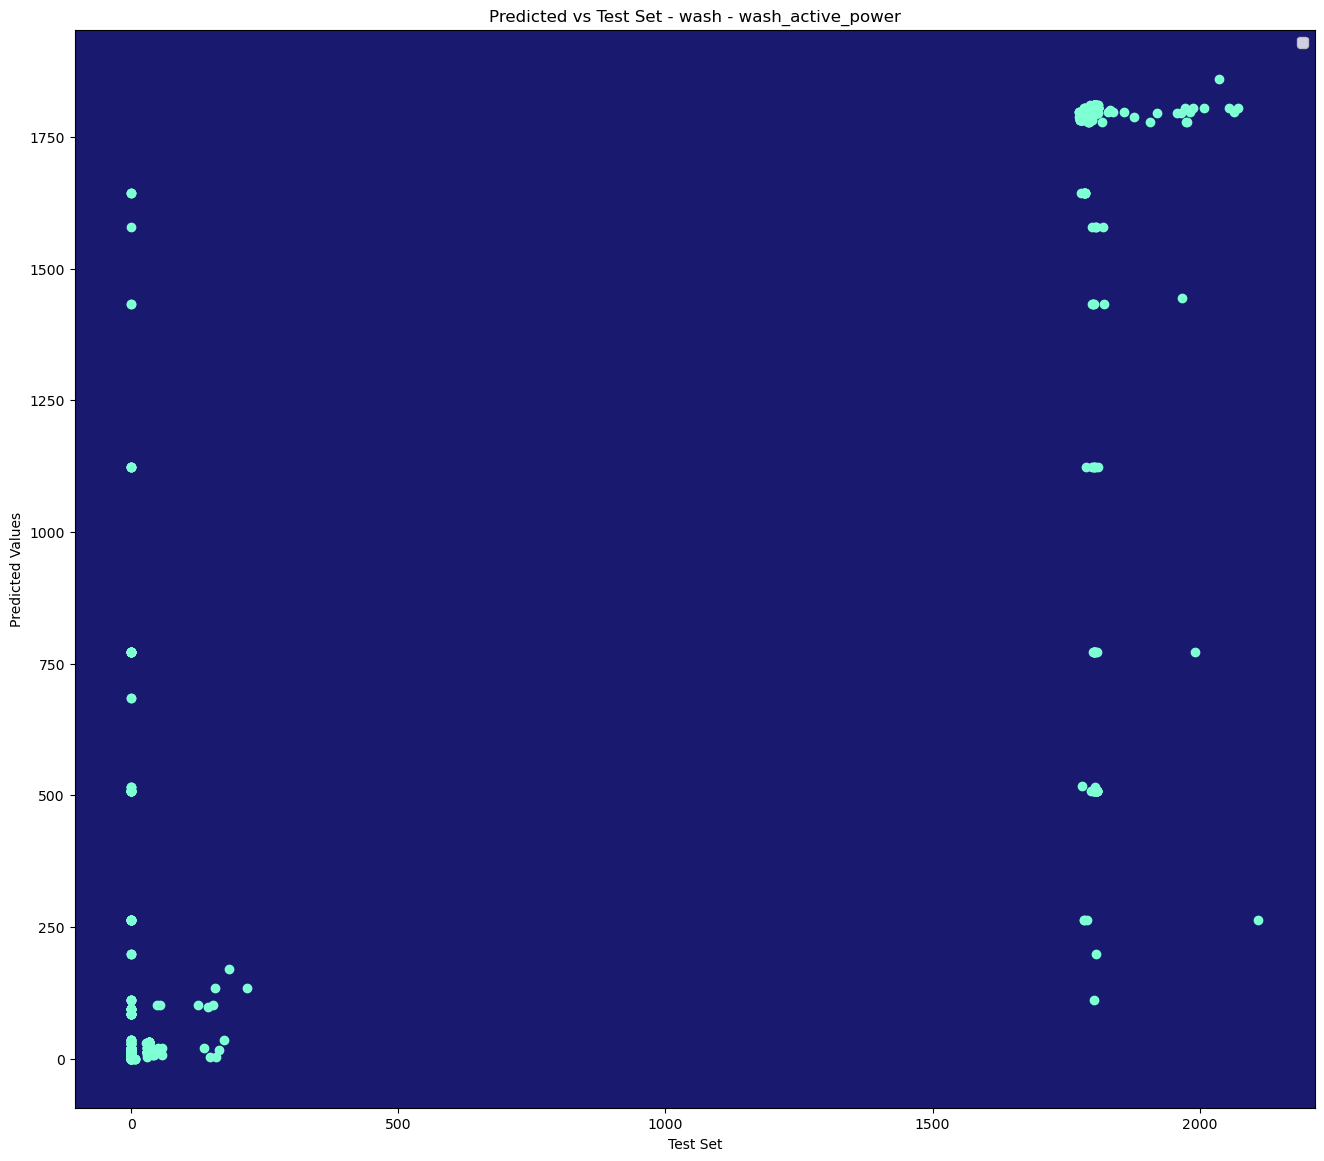

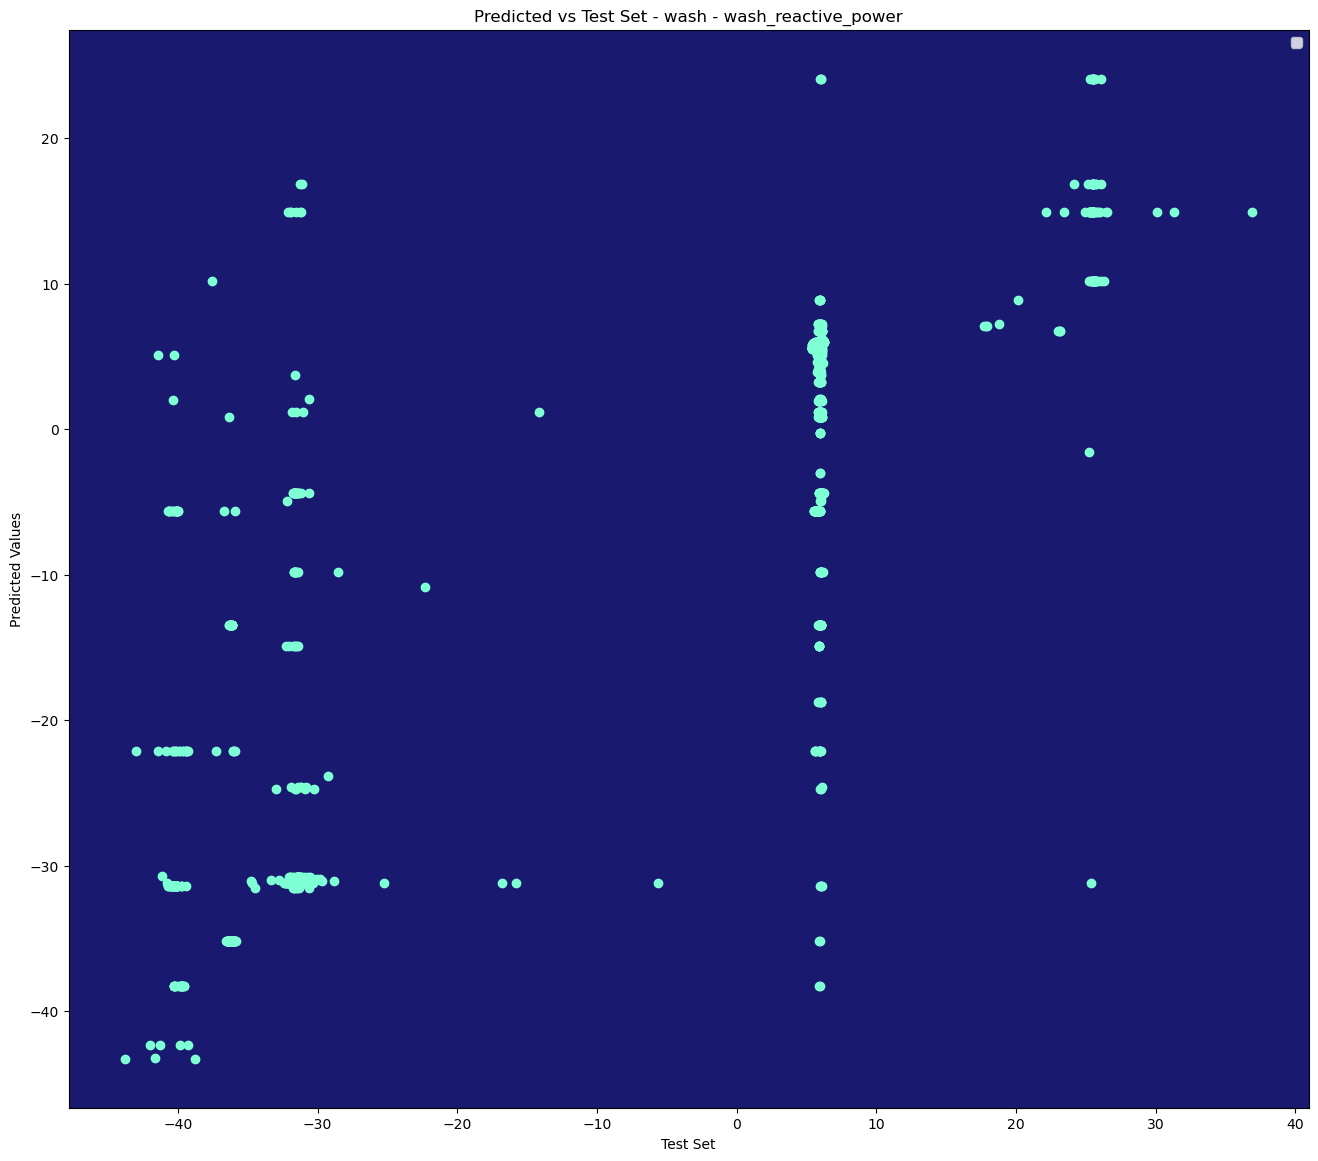

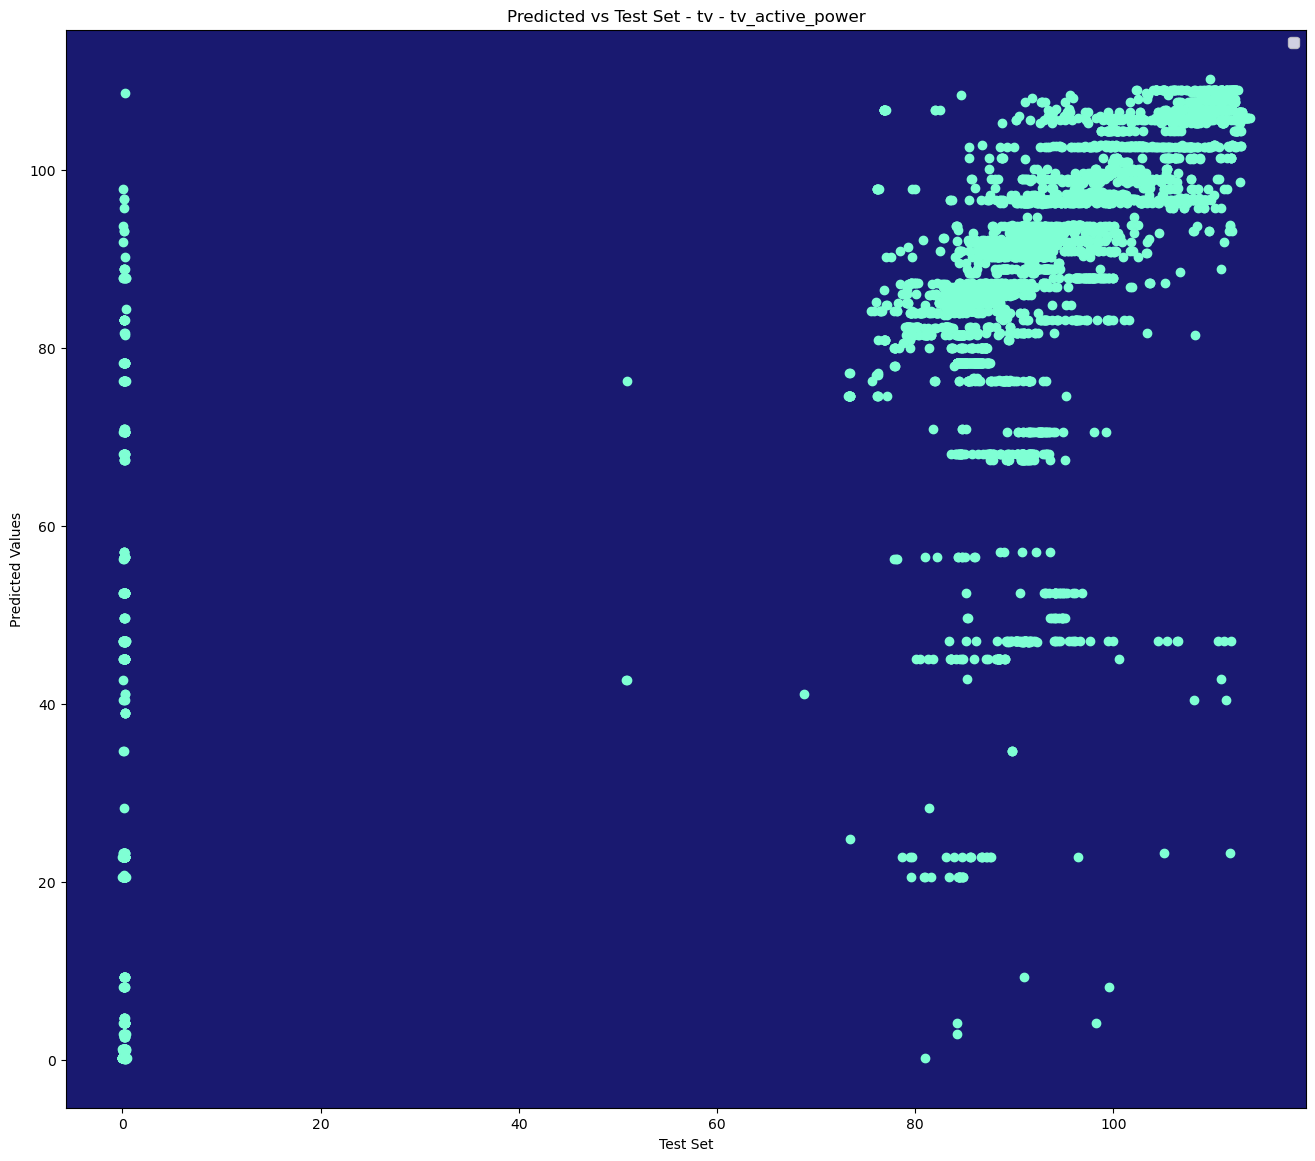

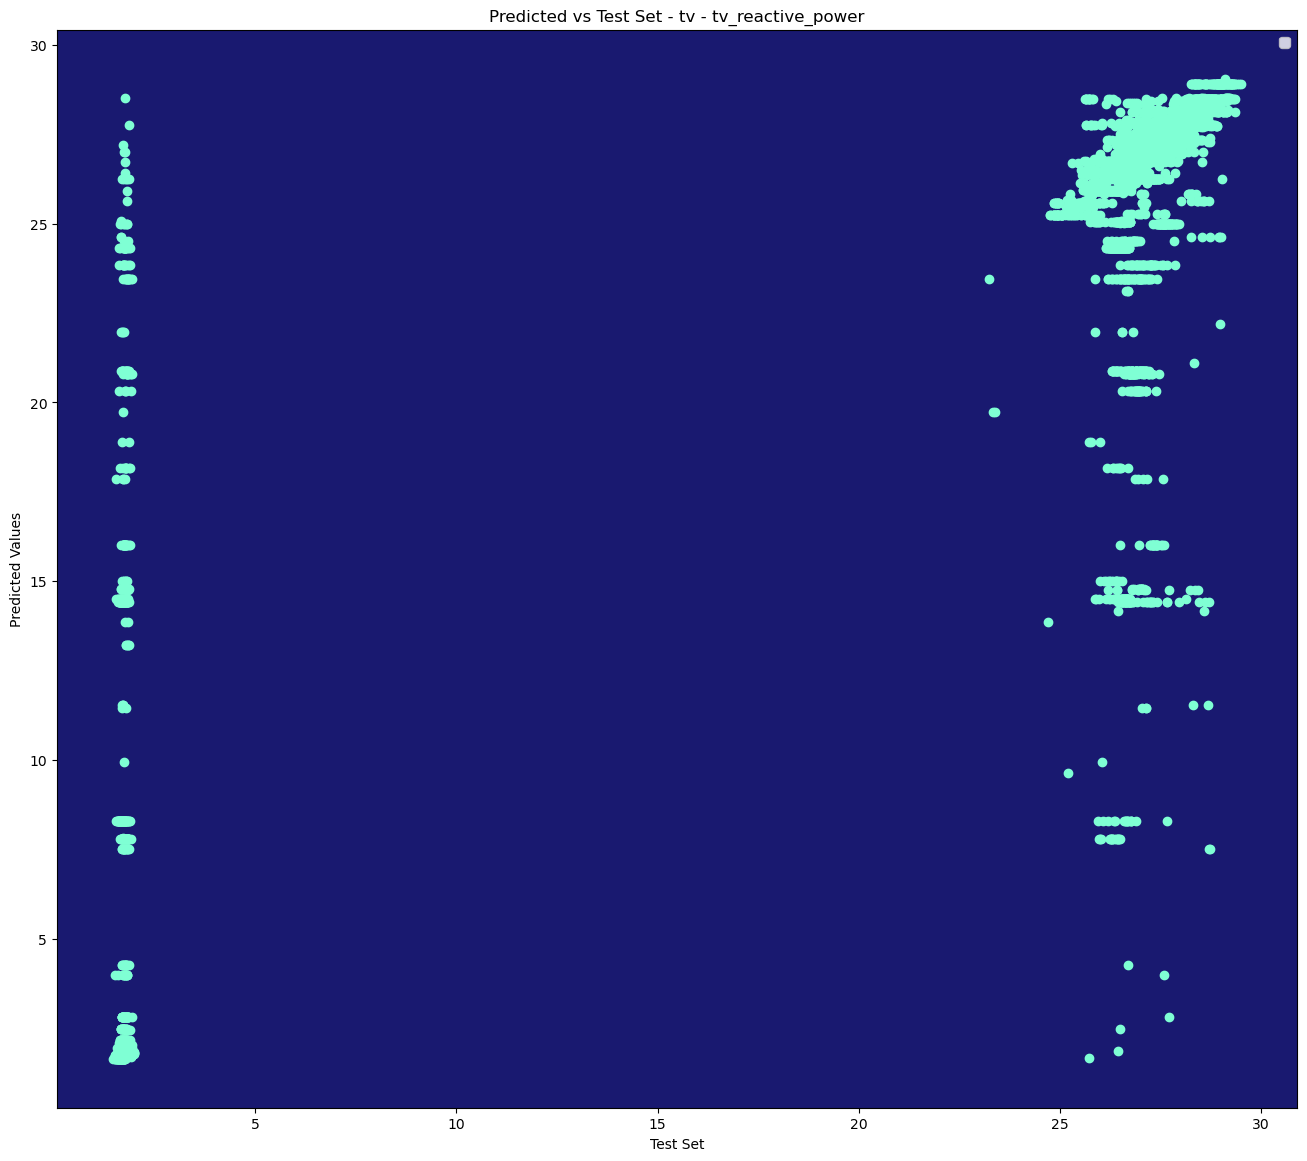

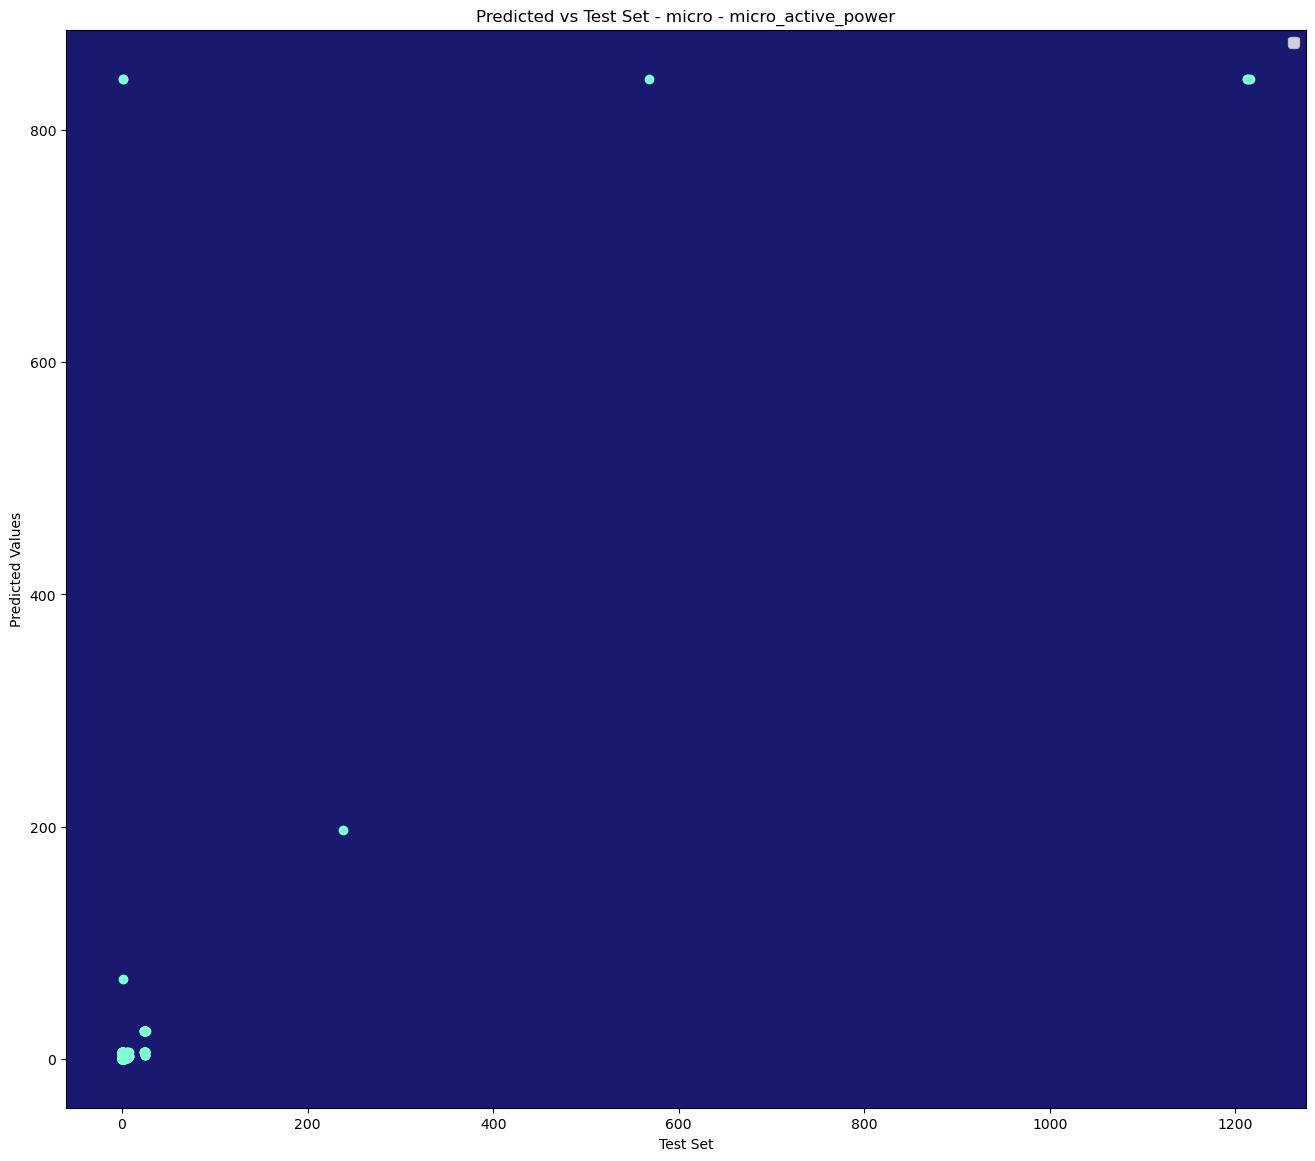

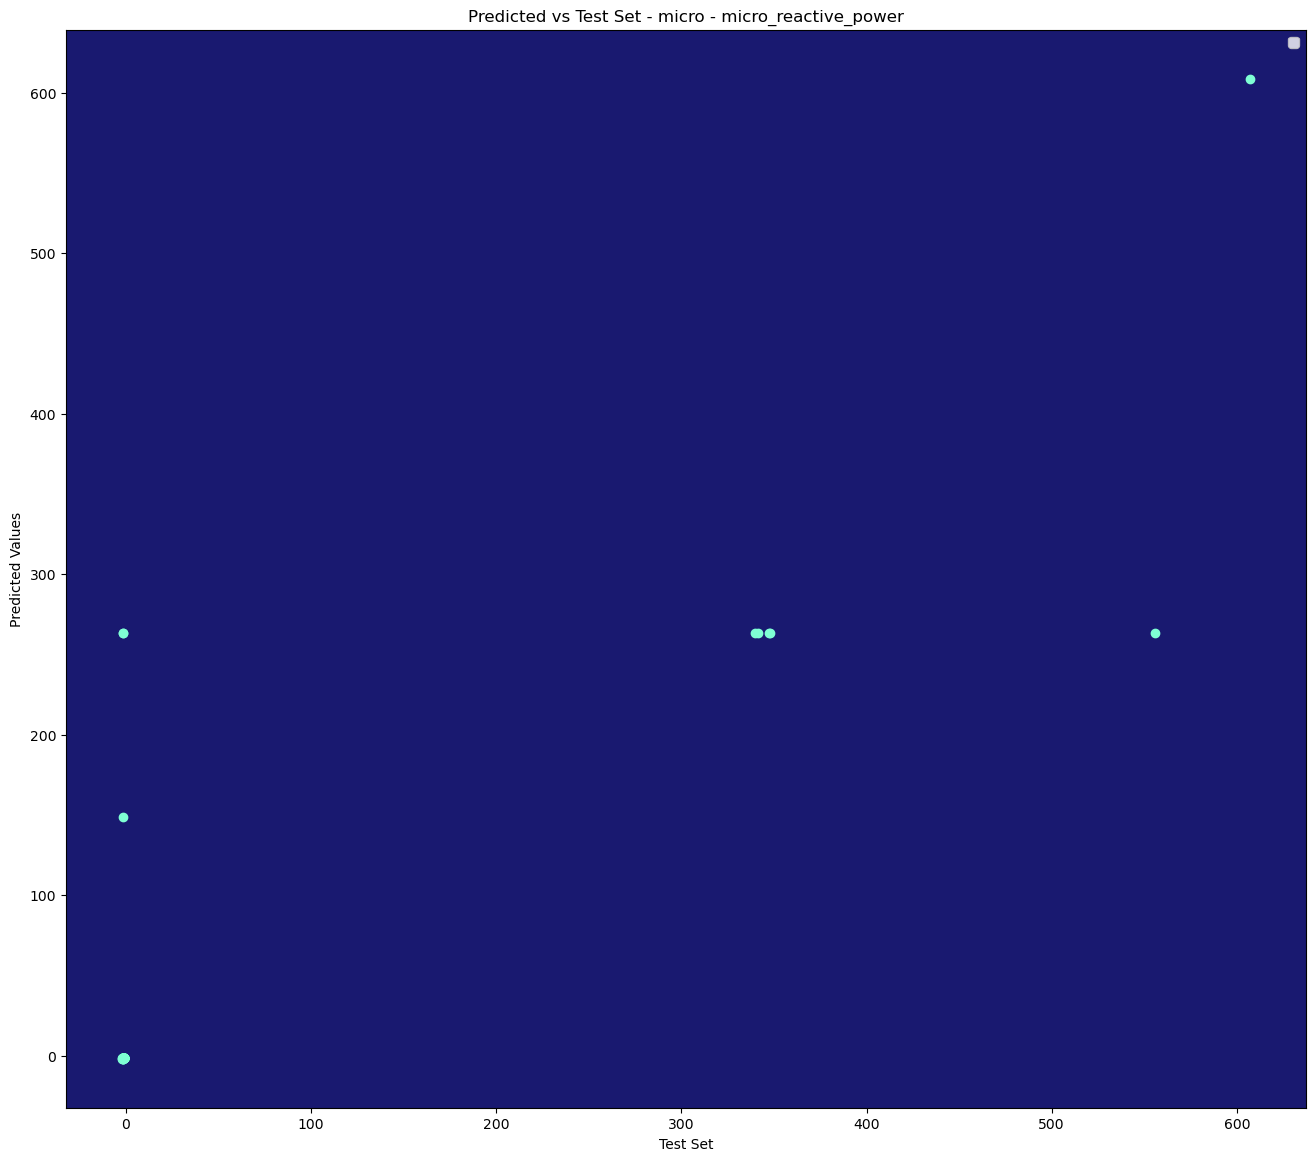

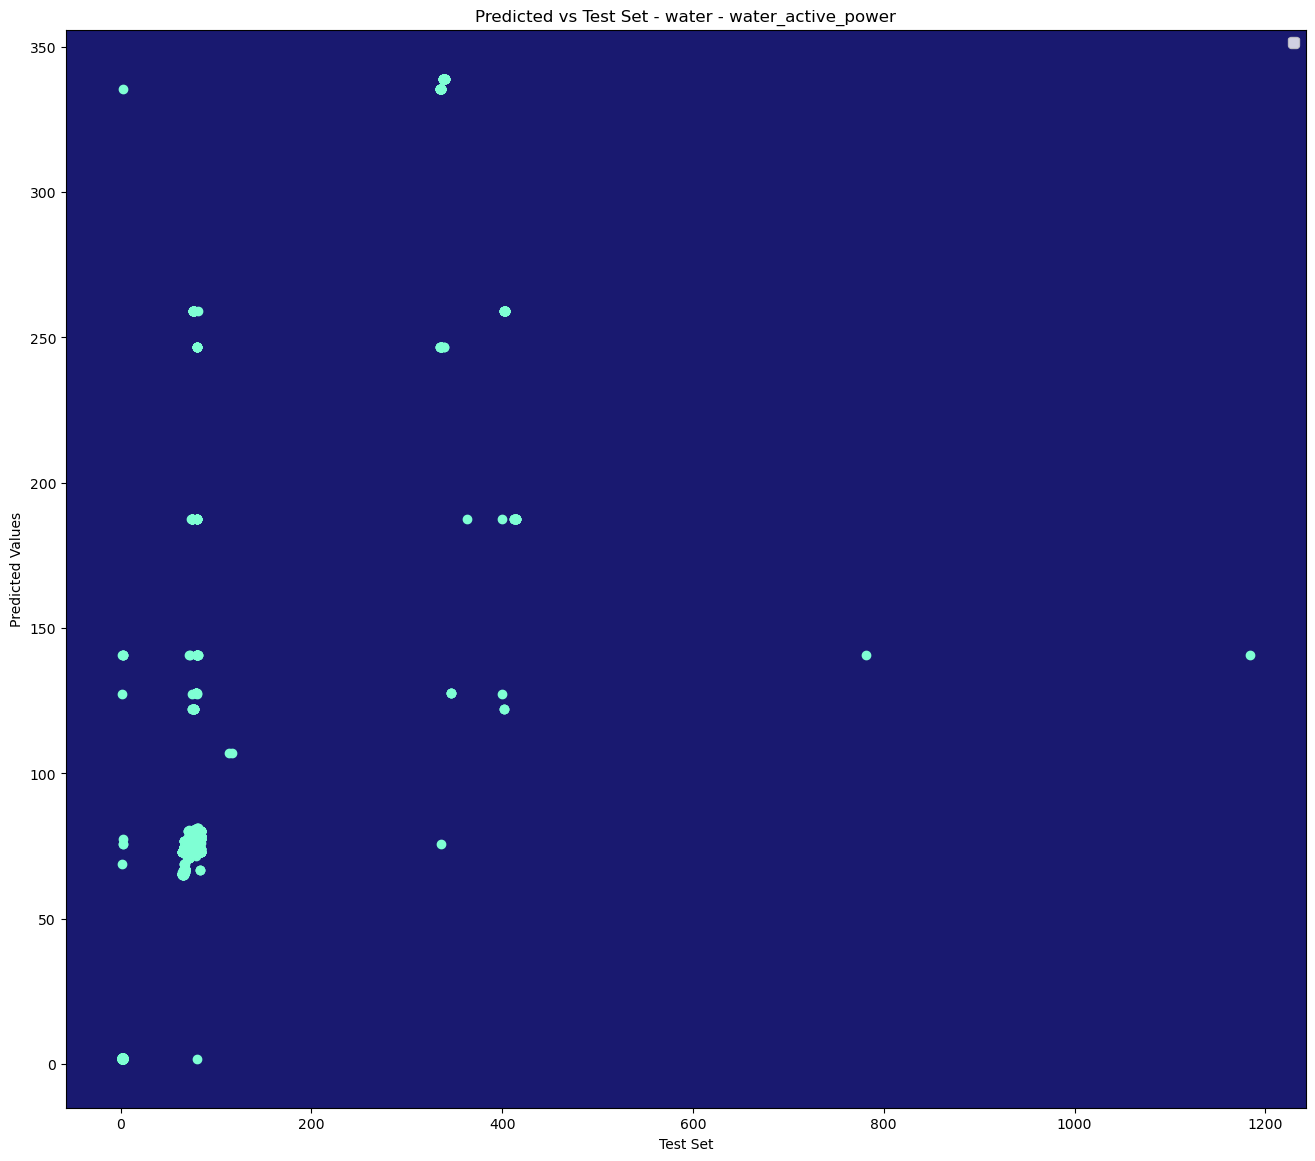

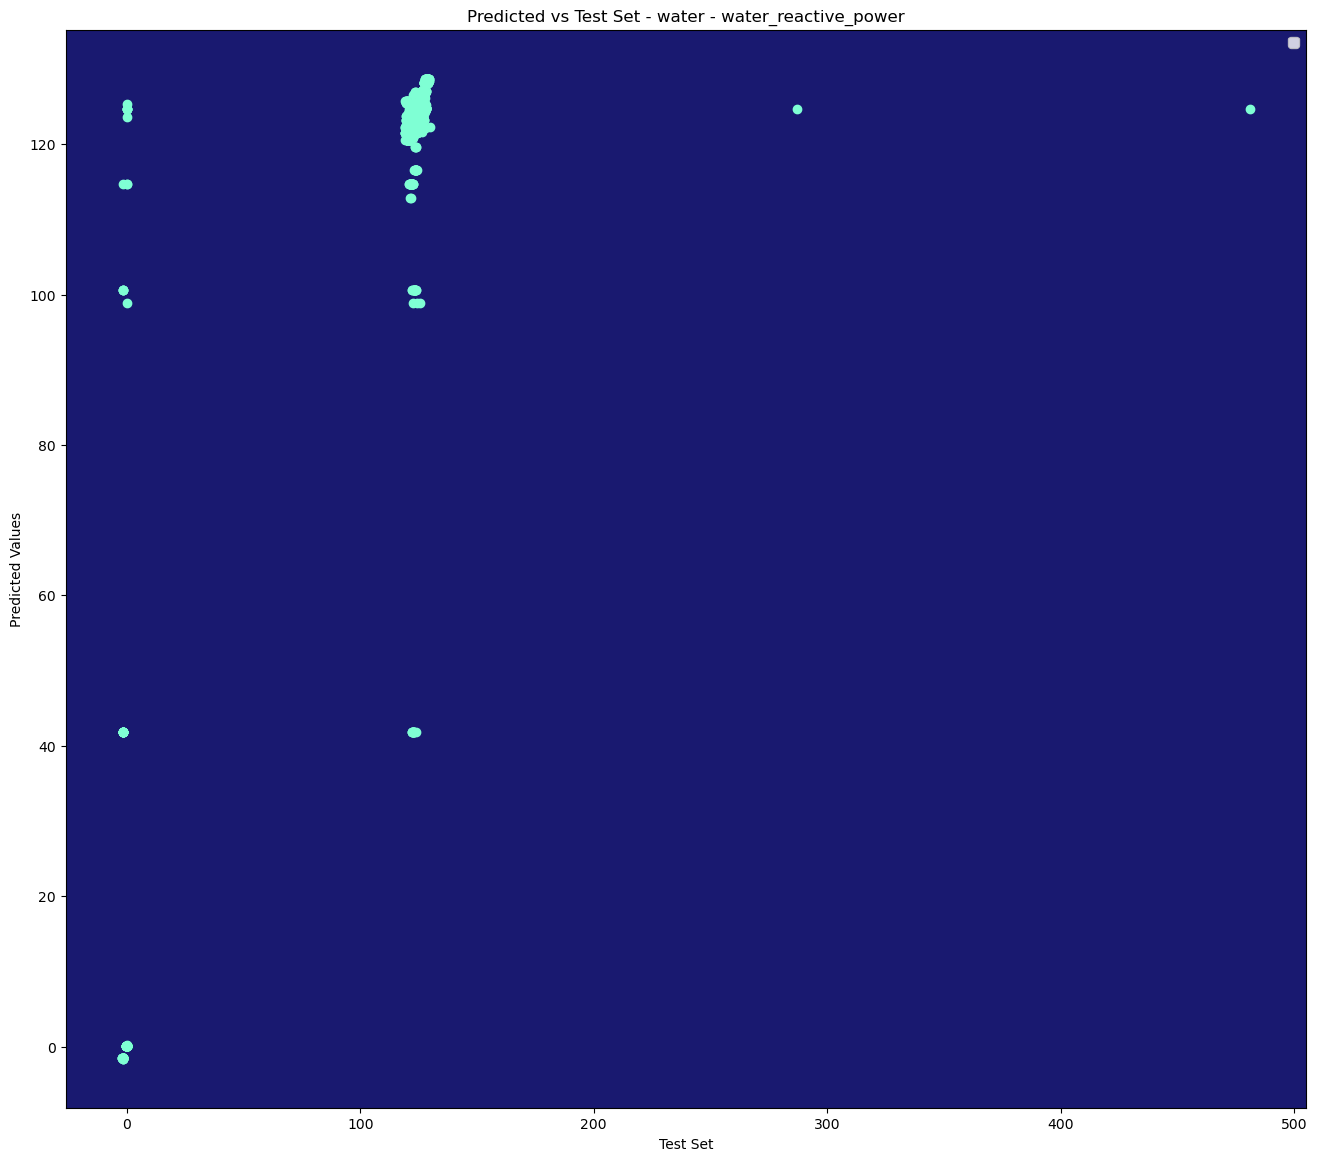

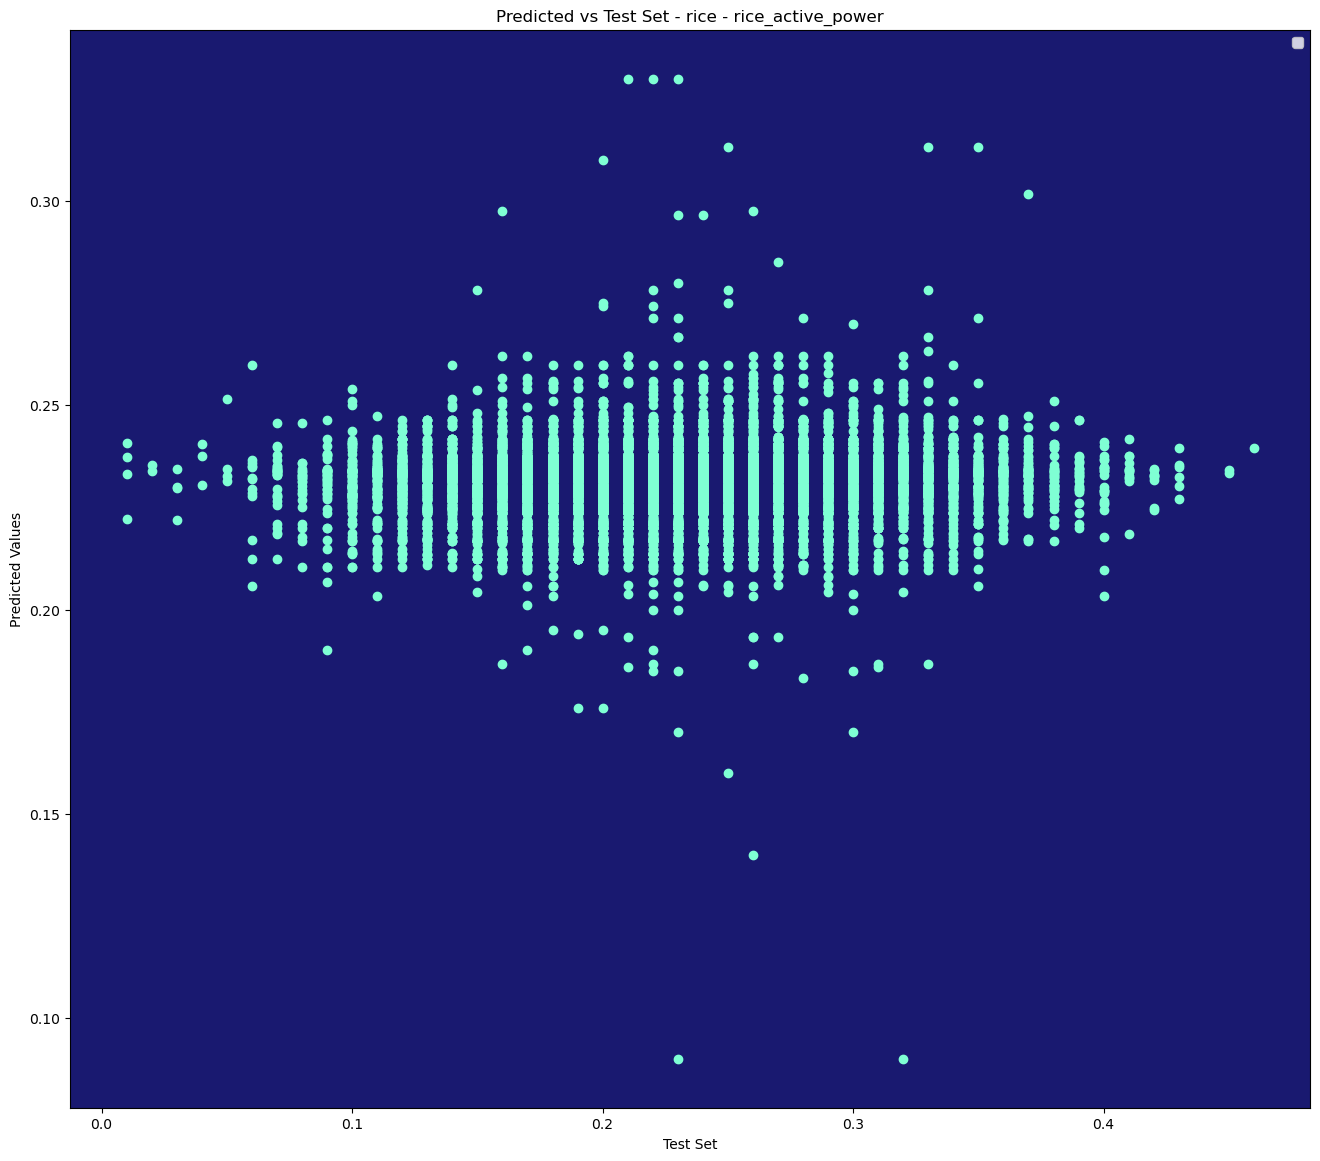

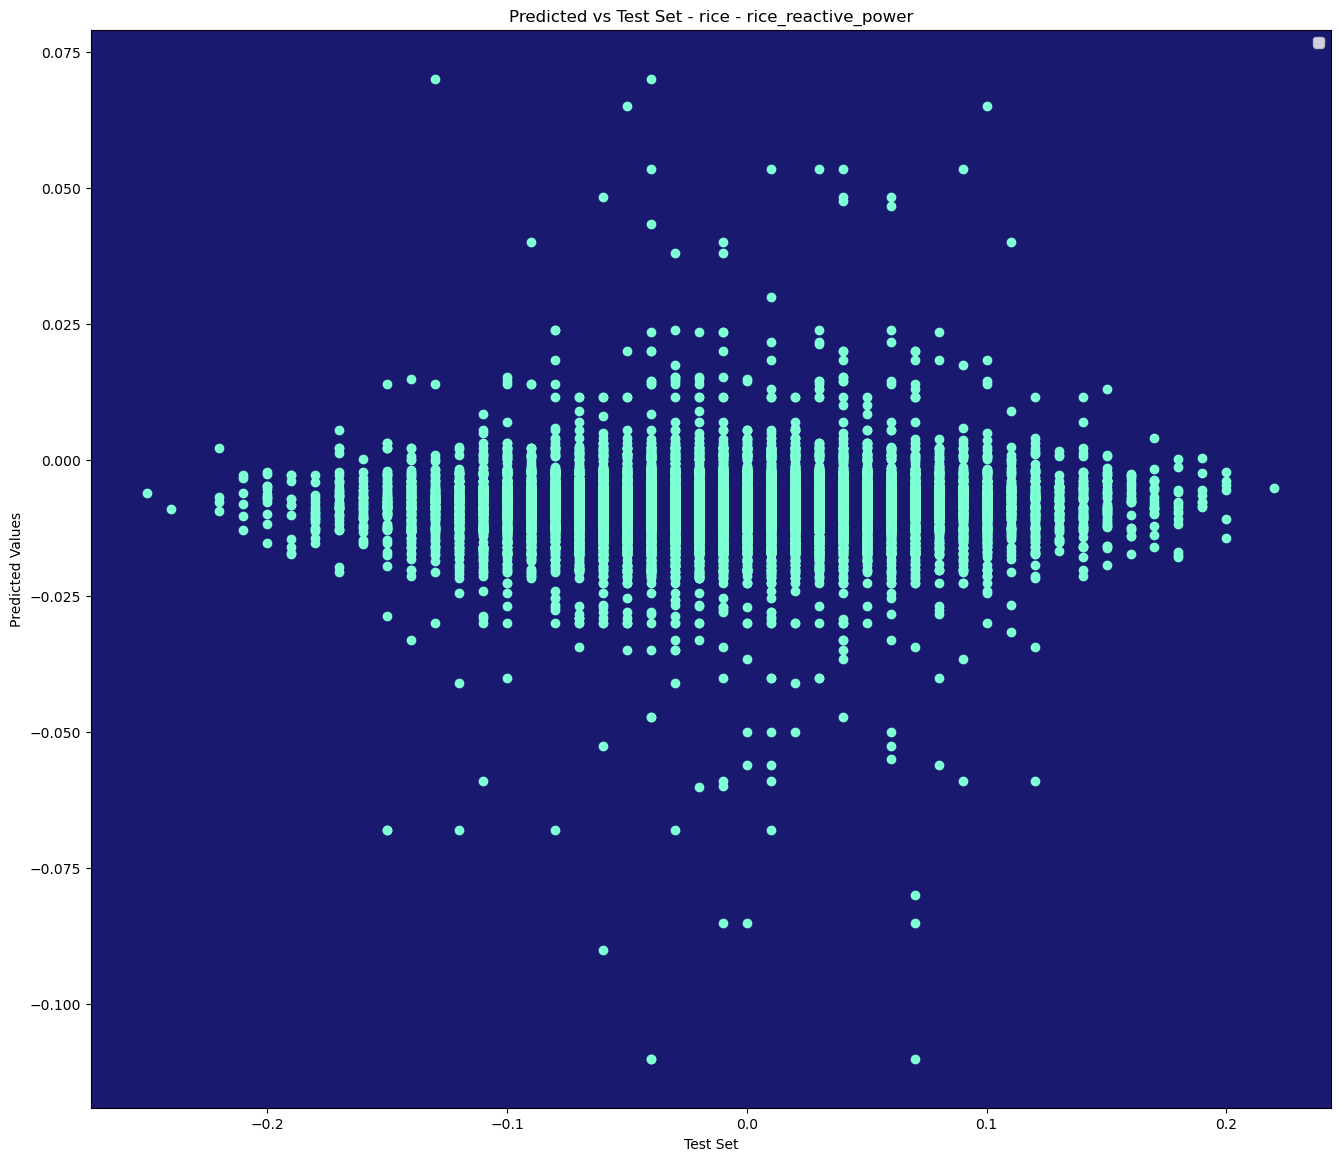

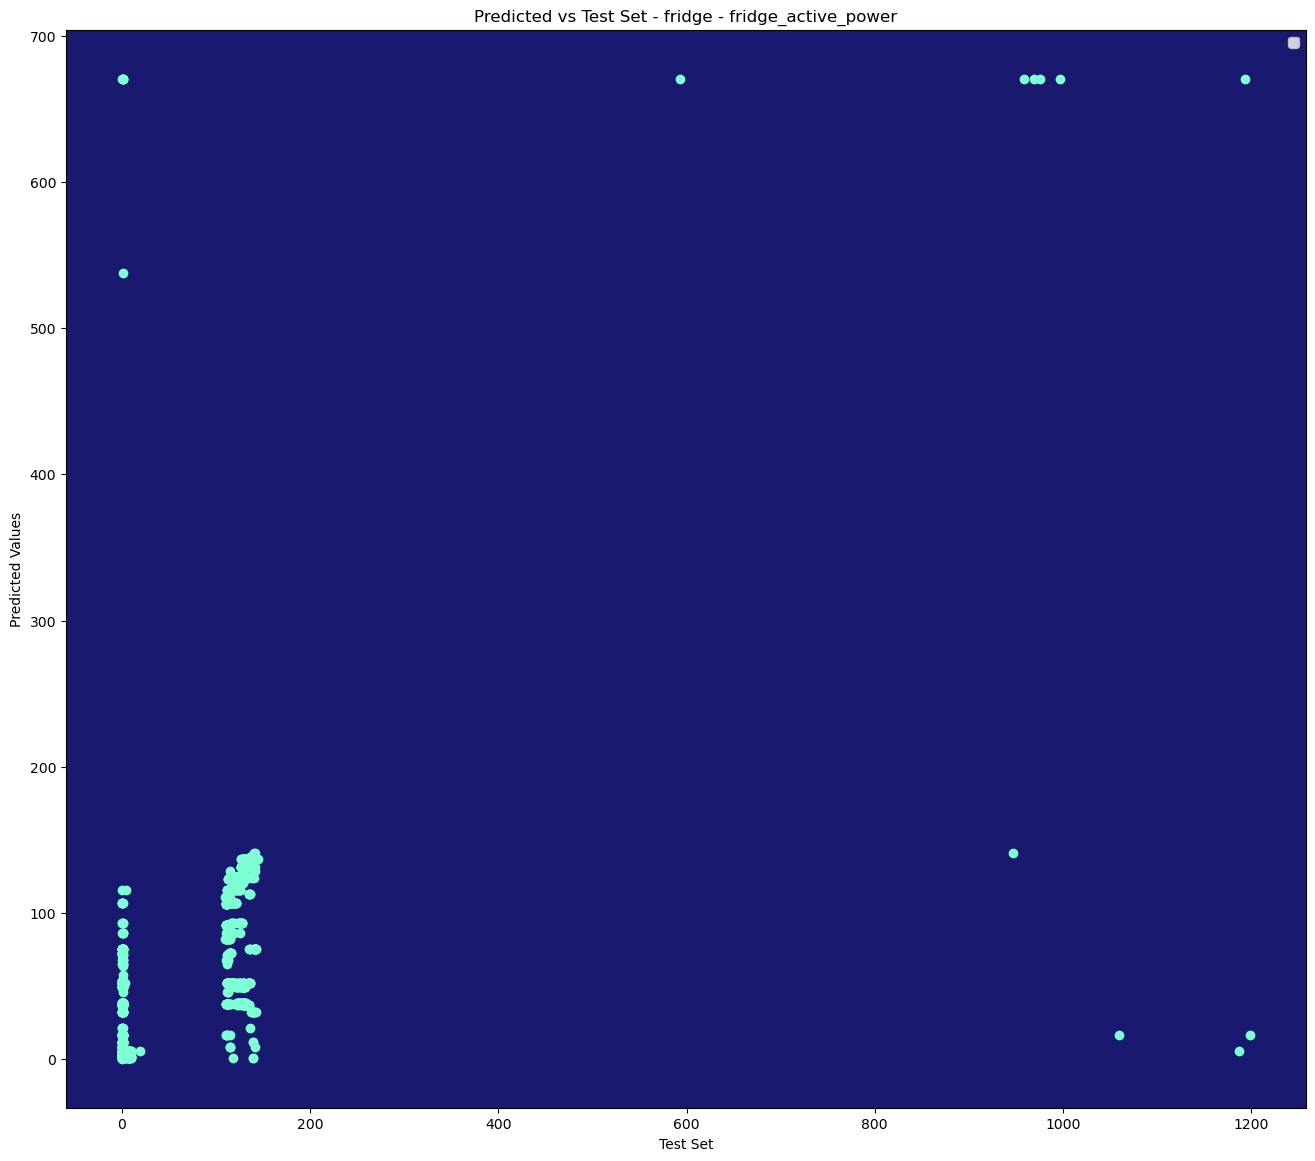

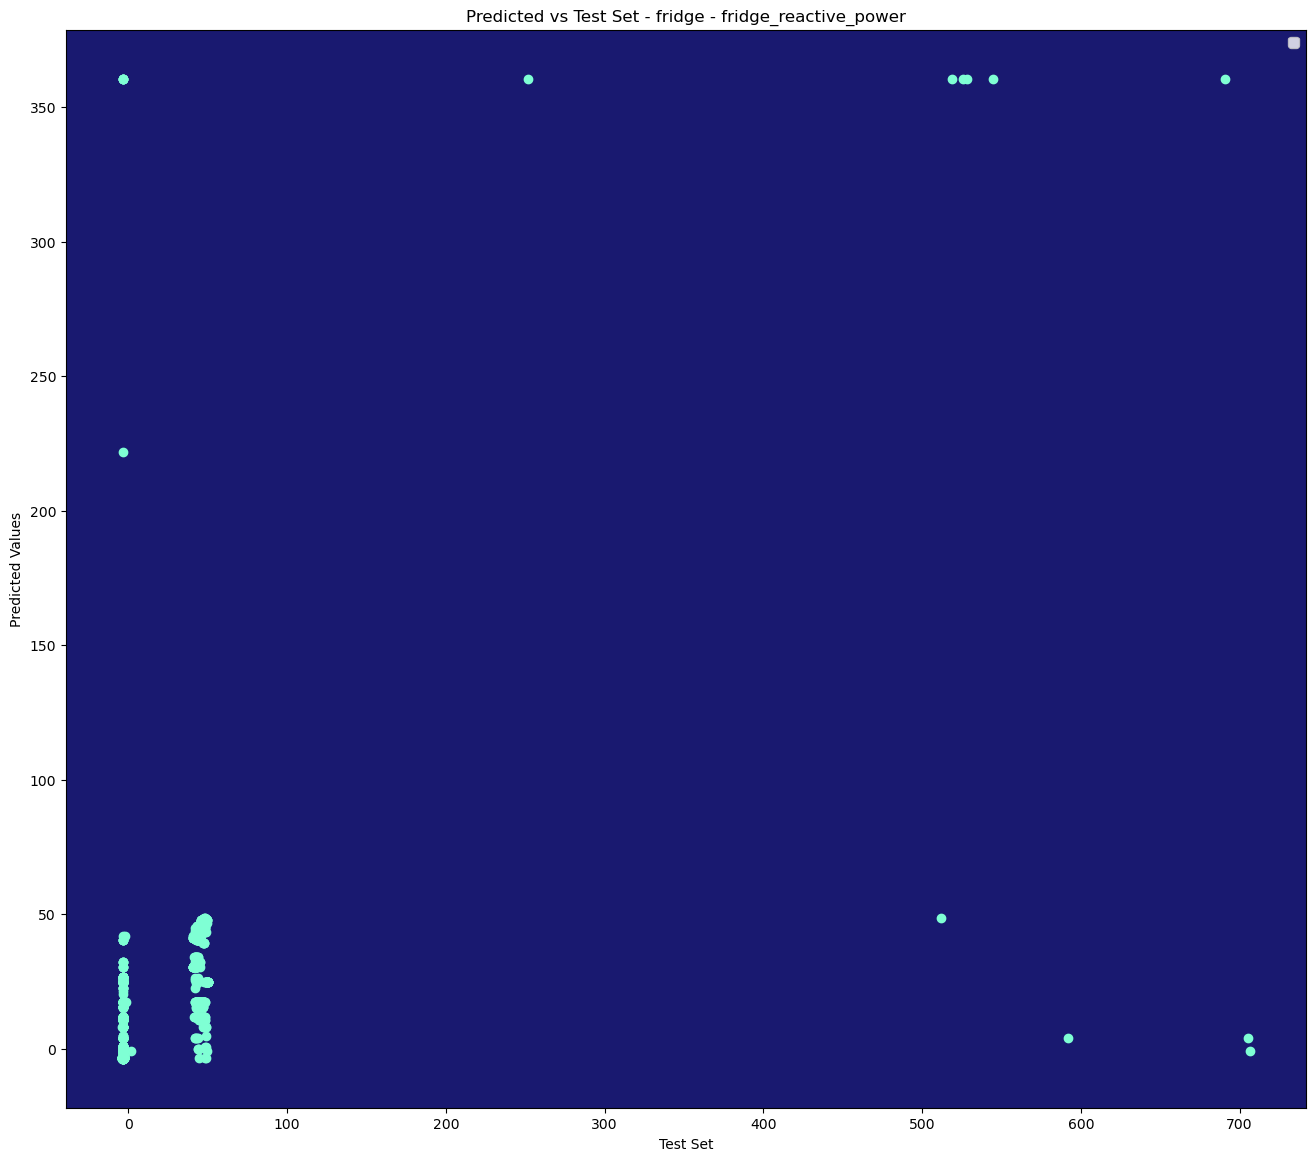

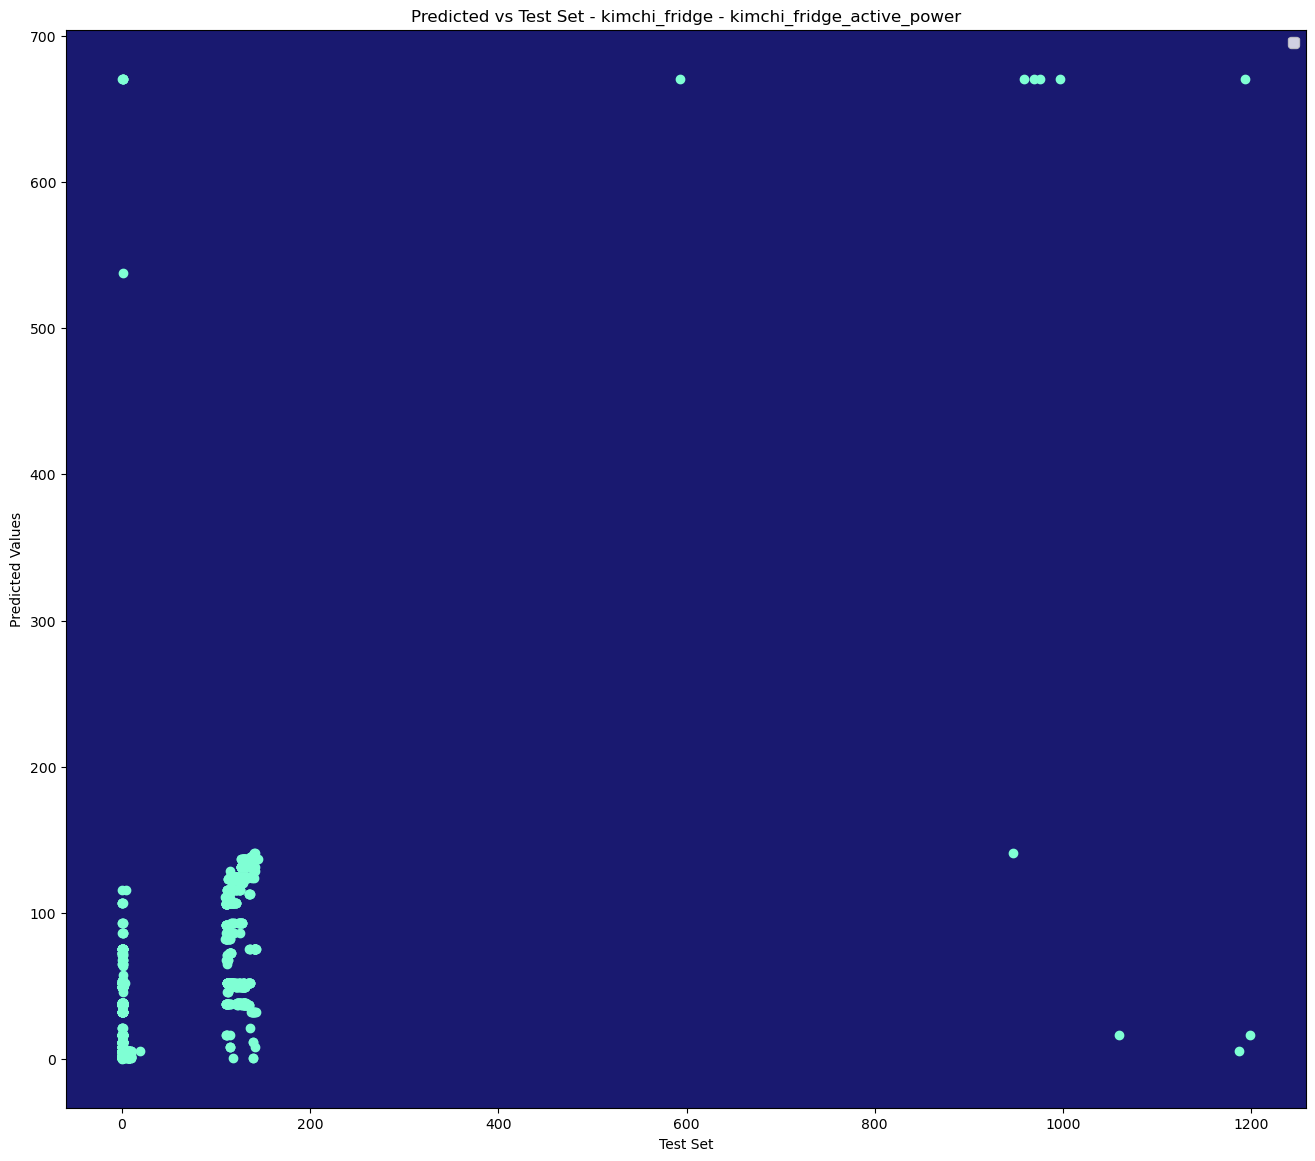

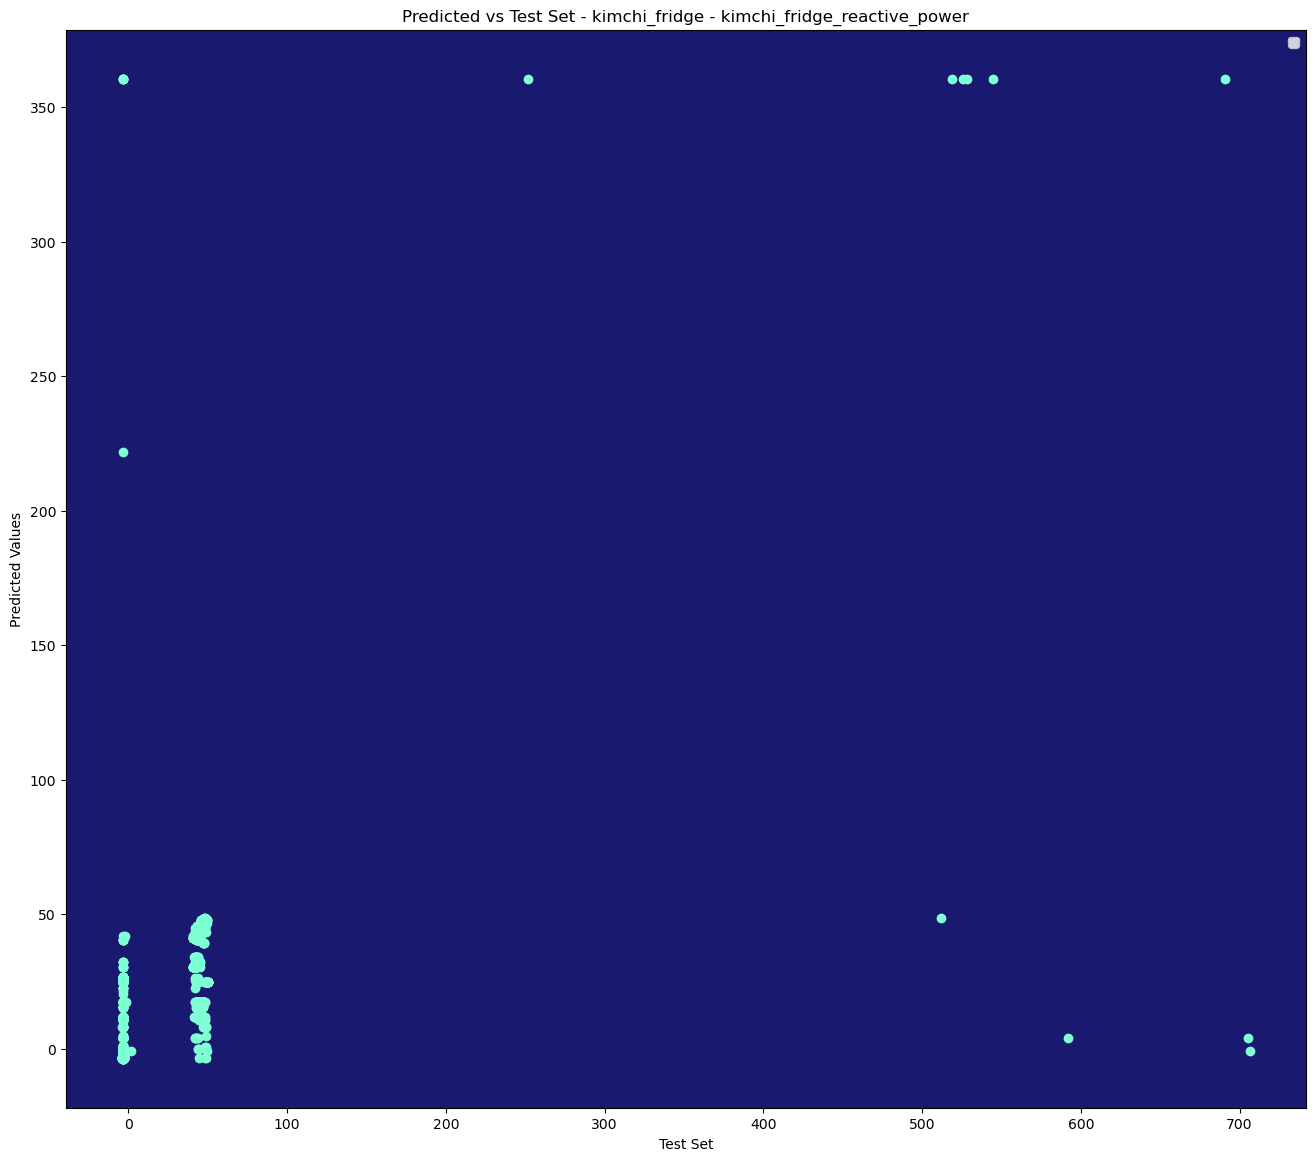

In [9]:
# Iterate over the devices
scatter_color = 'aquamarine'

for i, device in enumerate(['wash', 'tv', 'micro', 'water', 'rice','fridge', 'kimchi_fridge']):
    # Iterate over the output columns for the current device
    for j, output_col in enumerate(output_cols[device]):
        # Get the test data and predictions for the current device and output column
        test_values = tests[i][j].select(output_col).collect()
        predicted_values = predictions[device][j].select('prediction').collect()

        # Create a scatter plot for predicted vs test values
        plt.figure(figsize = (16,14))
        plt.scatter(test_values, predicted_values, color = scatter_color)
        plt.xlabel("Test Set")
        plt.ylabel("Predicted Values")
        plt.title(f"Predicted vs Test Set - {device} - {output_col}")
        plt.gca().set_facecolor('midnightblue')  # Change the background color 
        plt.legend()
        plt.show()
